#### 1. Вступление
## Описание наборов данных
Описание наборов данных
Данные были получены с сайта [visualcrossing][1] 
В этом блокноте будет использоваться набор данных:
- AlmatyWeatherDataSet.csv - данные содержат общую информацию о погоде (температуру, влажность, облачность, осадки и т.д.)
В наборе данных записи о приложении 35 переменных:
- 27 содержат численную информацию (int,float)
- 7 содержат информацию типа объект (object)
- 1 содержит информацию типа Дата (DateTime)

Информацию о каждом параметре можно посмотреть [Description][2] 

В данные были добавлены две дополнительные колонки
- yield - биомасса на техногенно-загрязненной почве, данные предоставлены [Институтом биологии и биотехнологии растений][3] 
 

  [1]: https://www.visualcrossing.com/weather/weather-data-services
  [2]: https://www.visualcrossing.com/resources/documentation/weather-data/weather-data-documentation/
  [3]: http://ipbb.kz

## 1.2 Зачем использовать scikit-learn
scikit-learn поддерживает:

- предварительную обработку данных;
- уменьшение размерности;
- выбор модели;
- регрессии;
- классификации;
- кластерный анализ.

Он также предоставляет несколько наборов данных, которые вы можете использовать для тестирования ваших моделей.

Scikit-learn не реализует все, что связано с машинным обучением. Например, он не имеет комплексной поддержки для:

- нейронных сетей;
- самоорганизующихся карт (сетей Кохонена);
- обучения ассоциативным правилам;
- обучения с подкреплением (reinforcement learning).

Scikit-learn основан на NumPy и SciPy, поэтому необходимо понять хотя бы азы этих двух библиотек, чтобы эффективно применять Scikit-learn.

Scikit-learn - это пакет с открытым исходным кодом. Как и большинство материалов из экосистемы Python, он бесплатный даже для коммерческого использования. Он лицензирован под лицензией BSD. 

Дополнительную информацию можно посмотреть [Scikit-learn][1] 

  [1]: https://scikit-learn.org/stable/index.html#

## 1.1 Что такое scikit-learn
<br>
<center>
<img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" alt="PyCaret" width="50%" height="50%">
</center><br>

Scikit-learn - один из наиболее широко используемых пакетов Python для Data Science и Machine Learning. Он позволяет выполнять множество операций и предоставляет множество алгоритмов. Scikit-learn также предлагает отличную документацию о своих классах, методах и функциях, а также описание используемых алгоритмов. 

# 2. Задачи

- Прогнозирования биомассы растения [miscanthus x giganteus][1] на техногенно-загрязненной почве   
    
  [1]: https://en.wikipedia.org/wiki/Miscanthus_×_giganteus
    

# 3. Библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
# Data split
from sklearn.model_selection import ShuffleSplit

# Preprocessing
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler,PolynomialFeatures

# Pipeline
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import set_config

# Metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# Feature Enginering
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest, RFE, RFECV
from sklearn.inspection import permutation_importance
import shap

#Linear Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, ElasticNet, SGDRegressor
#Tree-based models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xbg
# Staking model
from sklearn.ensemble import StackingRegressor

# NN
import tensorflow as tf
from tensorflow import keras 

set_config(display="diagram")
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


#display all output

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

from tqdm.notebook import tqdm 

In [2]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.333-b02, mixed mode)
  Starting server from C:\anaconda3\envs\tfwithproccesor\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Chingiz\AppData\Local\Temp\tmpeyi8btof
  JVM stdout: C:\Users\Chingiz\AppData\Local\Temp\tmpeyi8btof\h2o_Chingiz_started_from_python.out
  JVM stderr: C:\Users\Chingiz\AppData\Local\Temp\tmpeyi8btof\h2o_Chingiz_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Almaty
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,"1 year, 2 months and 15 days !!!"
H2O_cluster_name:,H2O_from_python_Chingiz_ds5rzb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.424 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [3]:
data = pd.read_excel('data.xlsx')

In [4]:
data

,Element,Description
0,Maximum Temperature,Maximum temperature over period
1,Minimum Temperature,Minimum temperature over period
2,Temperature,Temperature
3,Dew Point,Dew point
4,Wind Chill,Wind chill
5,Heat Index,Heat index
6,Feels like,"Combination of temperature, wind chill & heat ..."
7,Precipitation,Amount of liquid equivalent precipitation (rai...
8,Precipitation Cover,Percentage of time where measurable precipitat...
9,Snow,Amount of new snowfall


In [5]:
df = h2o.import_file("AlmatyWeatherDataSet.csv") # загрузка файла с данными в pandas DataFrame

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
df

name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,count,yield
almaty,2015-05-01 00:00:00,20,9,14.9,20,7,14.7,5.1,53.68,0,nan,0,nan,nan,1,18,12.7,243.7,1016.4,77,9.4,nan,nan,nan,nan,2015-05-01T05:46:41,2015-05-01T19:53:18,0.47,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"36883099999,36871099999,UAAA,36872099999,36870099999",1,1.05028
almaty,2015-05-02 00:00:00,20.5,13,16.4,20.5,13,16.4,8,58.72,0.64,nan,4.17,nan,nan,1,10.8,14.4,144.7,1017.3,92.4,9.7,nan,nan,nan,nan,2015-05-02T05:45:17,2015-05-02T19:54:27,0.49,"Rain, Overcast",Cloudy skies throughout the day with afternoon rain.,rain,"36883099999,36871099999,UAAA,36872099999,36870099999",2,2.53226
almaty,2015-05-03 00:00:00,22,9.5,15.9,22,8.6,15.9,7.1,58.77,0,nan,0,nan,nan,1,18,10.8,174.7,1017.5,80.7,8.9,nan,nan,nan,nan,2015-05-03T05:43:55,2015-05-03T19:55:36,0.5,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"36883099999,36871099999,UAAA,36872099999,36870099999",3,3.53464
almaty,2015-05-04 00:00:00,25,7,17.2,25,6.3,17.1,4.4,45.89,0,nan,0,nan,nan,1,10.8,21.6,127.9,1013.4,45.2,10.4,nan,nan,nan,nan,2015-05-04T05:42:34,2015-05-04T19:56:45,0.5,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"36883099999,36871099999,UAAA,36872099999,36870099999",4,7.21469
almaty,2015-05-05 00:00:00,23.3,9,17.7,23.3,8.5,17.7,7.8,53.55,0,nan,0,nan,nan,1,18,19.9,110.9,1010.9,85.4,10.2,nan,nan,nan,nan,2015-05-05T05:41:14,2015-05-05T19:57:53,0.51,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"36883099999,36871099999,UAAA,36872099999,36870099999",5,12.2953
almaty,2015-05-06 00:00:00,28,15,21.9,27,15,21.8,6.9,39.8,0.12,nan,8.33,nan,nan,nan,18,16.1,214,1007.6,70.1,10,nan,nan,nan,nan,2015-05-06T05:39:56,2015-05-06T19:59:01,0.53,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"36883099999,36871099999,UAAA,36872099999,36870099999",6,17.1814
almaty,2015-05-07 00:00:00,28.4,14,21.3,27.4,14,21.2,8.5,45.57,0,nan,0,nan,nan,1,14.4,12.7,115.6,1007.8,81.5,9.9,nan,nan,nan,nan,2015-05-07T05:38:39,2015-05-07T20:00:09,0.56,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"36883099999,36871099999,UAAA,36872099999,36870099999",7,23.2676
almaty,2015-05-08 00:00:00,29,14,22.6,28.6,14,22.5,11.2,50.24,0,nan,0,nan,nan,1.2,14.4,25.2,158.8,1004.6,83.7,9.8,nan,nan,nan,nan,2015-05-08T05:37:23,2015-05-08T20:01:17,0.6,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"36883099999,36871099999,UAAA,36872099999,36870099999",8,25.1294
almaty,2015-05-09 00:00:00,21.9,13,17.3,21.9,13,17.3,11.9,71.89,0,nan,0,nan,nan,3.4,54,36,188.4,1008.8,85.9,9.5,nan,nan,nan,nan,2015-05-09T05:36:09,2015-05-09T20:02:24,0.65,Partially cloudy,Partly cloudy throughout the day.,wind,"36883099999,36871099999,UAAA,36872099999,36870099999",9,29.0273
almaty,2015-05-10 00:00:00,23.5,10,17,23.5,9.6,17,11.4,71.04,15.47,nan,4.17,nan,nan,1,18,14.4,133,1014.8,83.3,10.3,nan,nan,nan,nan,2015-05-10T05:34:56,2015-05-10T20:03:31,0.7,"Rain, Partially cloudy",Partly cloudy throughout the day with early morning rain.,rain,"36883099999,36871099999,UAAA,36872099999,36870099999",10,35.4558


In [7]:
df.describe()

Rows:847
Cols:35




,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,count,yield
type,enum,time,real,real,real,real,real,real,real,real,real,int,real,int,int,real,real,real,real,real,real,real,int,int,int,int,string,string,real,enum,enum,enum,enum,int,real
mins,,1430438400000.0,11.6,1.0,6.5,11.6,-1.3,4.9,-0.9,19.03,0.0,NaN,0.0,NaN,NaN,1.0,7.2,6.9,62.4,993.7,1.3,6.4,NaN,NaN,NaN,NaN,NaN,NaN,0.0,,,,,1.0,1.035633486941271
mean,,1530329142857.1428,28.85194805194805,14.967296340023612,22.158323494687128,27.780755608028336,14.825029515938606,21.807083825265643,9.109917355371898,47.944167650531284,2.1058205430932704,0.0,2.4365171192443915,0.0,0.0,1.5974647887323943,27.54081145584725,18.99445100354191,160.6831168831169,1008.251121605667,57.354899645808736,10.700354191263282,0.0,0.0,0.0,0.0,NaN,NaN,0.5043565525383708,,,,,61.0,721.3524636431928
maxs,,1630195200000.0,40.0,26.7,31.6,37.4,26.5,30.3,16.3,90.54,178.88,NaN,12.5,NaN,NaN,19.41,172.8,50.4,253.3,1030.6,97.6,19.6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,,,,,121.0,1603.156351368532
sigma,,63230813222.43786,5.0673215195644525,4.108985729078584,4.367481221650372,4.296138284147058,4.408077339664212,4.138731532278302,3.017430978410914,13.09665636809142,8.152751772947784,-0.0,3.1958340246148973,-0.0,-0.0,2.2042961194735646,21.103330133178705,6.817674839153817,40.147965814819095,5.613641822278579,23.38458598946966,1.0565957947363953,-0.0,-0.0,-0.0,-0.0,NaN,NaN,0.3042974785671624,,,,,34.94913561703996,506.1971743427061
zeros,,0,0,0,0,0,0,0,0,0,514,0,496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,,,,,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,847,0,847,847,350,9,0,0,0,0,0,847,847,847,847,0,0,0,0,0,0,0,0,0
0,almaty,2015-05-01 00:00:00,20.0,9.0,14.9,20.0,7.0,14.7,5.1,53.68,0.0,nan,0.0,nan,nan,1.0,18.0,12.7,243.7,1016.4,77.0,9.4,nan,nan,nan,nan,2015-05-01T05:46:41,2015-05-01T19:53:18,0.47,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"36883099999,36871099999,UAAA,36872099999,36870099999",1.0,1.0502771520718586
1,almaty,2015-05-02 00:00:00,20.5,13.0,16.4,20.5,13.0,16.4,8.0,58.72,0.64,nan,4.17,nan,nan,1.0,10.8,14.4,144.7,1017.3,92.4,9.7,nan,nan,nan,nan,2015-05-02T05:45:17,2015-05-02T19:54:27,0.49,"Rain, Overcast",Cloudy skies throughout the day with afternoon rain.,rain,"36883099999,36871099999,UAAA,36872099999,36870099999",2.0,2.5322581487954077
2,almaty,2015-05-03 00:00:00,22.0,9.5,15.9,22.0,8.6,15.9,7.1,58.77,0.0,nan,0.0,nan,nan,1.0,18.0,10.8,174.7,1017.5,80.7,8.9,nan,nan,nan,nan,2015-05-03T05:43:55,2015-05-03T19:55:36,0.5,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"36883099999,36871099999,UAAA,36872099999,36870099999",3.0,3.534636480033919


# 4. Чтение данных

In [8]:
df = pd.read_csv("AlmatyWeatherDataSet.csv") # загрузка файлас данными в pandas DataFrame

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              847 non-null    object 
 1   datetime          847 non-null    object 
 2   tempmax           847 non-null    float64
 3   tempmin           847 non-null    float64
 4   temp              847 non-null    float64
 5   feelslikemax      847 non-null    float64
 6   feelslikemin      847 non-null    float64
 7   feelslike         847 non-null    float64
 8   dew               847 non-null    float64
 9   humidity          847 non-null    float64
 10  precip            847 non-null    float64
 11  precipprob        0 non-null      float64
 12  precipcover       847 non-null    float64
 13  preciptype        0 non-null      float64
 14  snow              0 non-null      float64
 15  snowdepth         497 non-null    float64
 16  windgust          838 non-null    float64
 1

In [10]:
df.datetime

0      2015-05-01
1      2015-05-02
2      2015-05-03
3      2015-05-04
4      2015-05-05
          ...    
842    2021-08-25
843    2021-08-26
844    2021-08-27
845    2021-08-28
846    2021-08-29
Name: datetime, Length: 847, dtype: object

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tempmax,847.0,28.851948,5.067322,11.600000,25.500000,29.100000,33.000000,40.000000
tempmin,847.0,14.967296,4.108986,1.000000,12.500000,15.000000,18.000000,26.700000
temp,847.0,22.158323,4.367481,6.500000,19.150000,22.600000,25.500000,31.600000
feelslikemax,847.0,27.780756,4.296138,11.600000,25.500000,28.100000,30.800000,37.400000
feelslikemin,847.0,14.825030,4.408077,-1.300000,12.500000,15.000000,18.000000,26.500000
feelslike,847.0,21.807084,4.138732,4.900000,19.100000,22.400000,25.000000,30.300000
dew,847.0,9.109917,3.017431,-0.900000,7.000000,9.300000,11.300000,16.300000
humidity,847.0,47.944168,13.096656,19.030000,37.355000,46.910000,56.280000,90.540000
precip,847.0,2.105821,8.152752,0.000000,0.000000,0.000000,0.770000,178.880000
precipprob,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#drop empty columns
df = df.drop(['precipprob','preciptype','snow','solarradiation','solarenergy','uvindex','severerisk'],axis=1)

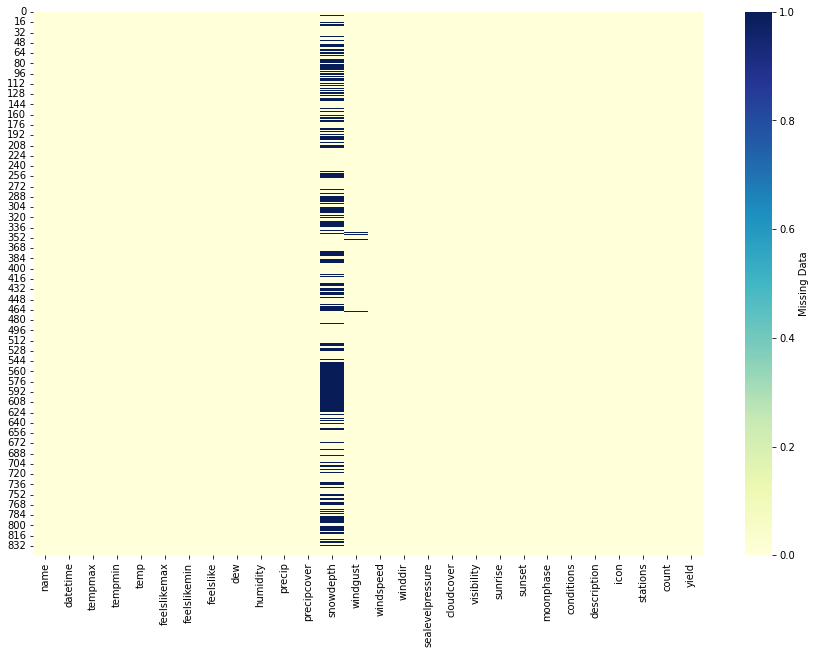

In [13]:
# проверим, например, отсутствующие/нулевые значения и найдем способы их устранения.
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.show()

На этом рисунке показано, что отсутствуют значения, только в двух функциях. Теперь мы можем либо вставить пропущенные значения здесь, либо сделать это позже, когда разработаем пайплайн. На рисунке представлены не все функции, но когда мы будем разрабатывать конвейер, мы позаботимся об отсутствующих значениях во всех функциях, которые должны использоваться. Я инкапсулирую методы вменения вместе с регрессором позже в процессе.

In [14]:
# удаляем snowdepth - это количество снего у не чуть больше половины отсутствуют значений, и расчёт ведёться с мая
df = df.drop(['snowdepth','sunrise','sunset'],axis=1)
#'datetime'

In [15]:
df = df.drop(['name'],axis=1)

In [16]:
df.drop_duplicates(inplace=True)

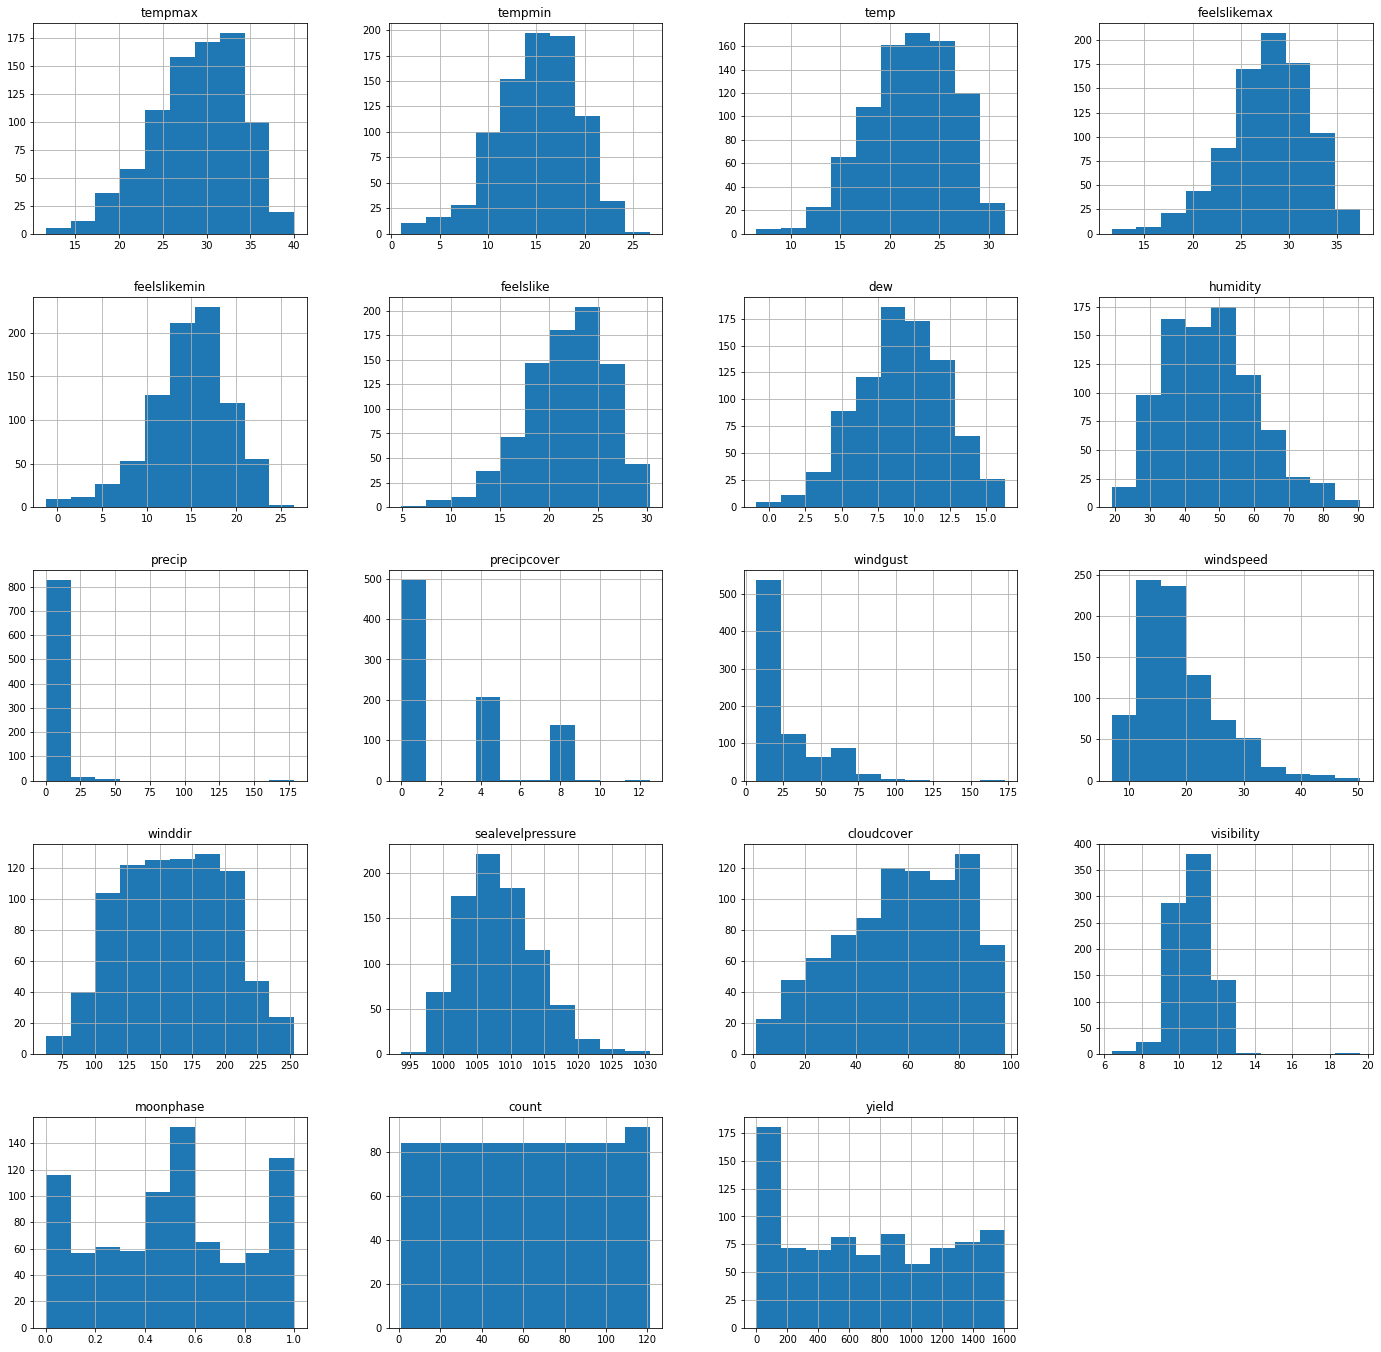

In [17]:
#Существует 847 образцов данных с соответствующими характеристиками и метаданными, показанными выше.
#Мы можем увидеть основную информацию о числовой функции в таблице. Посмотрим их распределение.
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[24,24]);

Мы можем иметь достаточно хорошее представление о числовых характеристиках, о том, как они выглядят, об их общих значениях

## Построение корреляционной матрицы

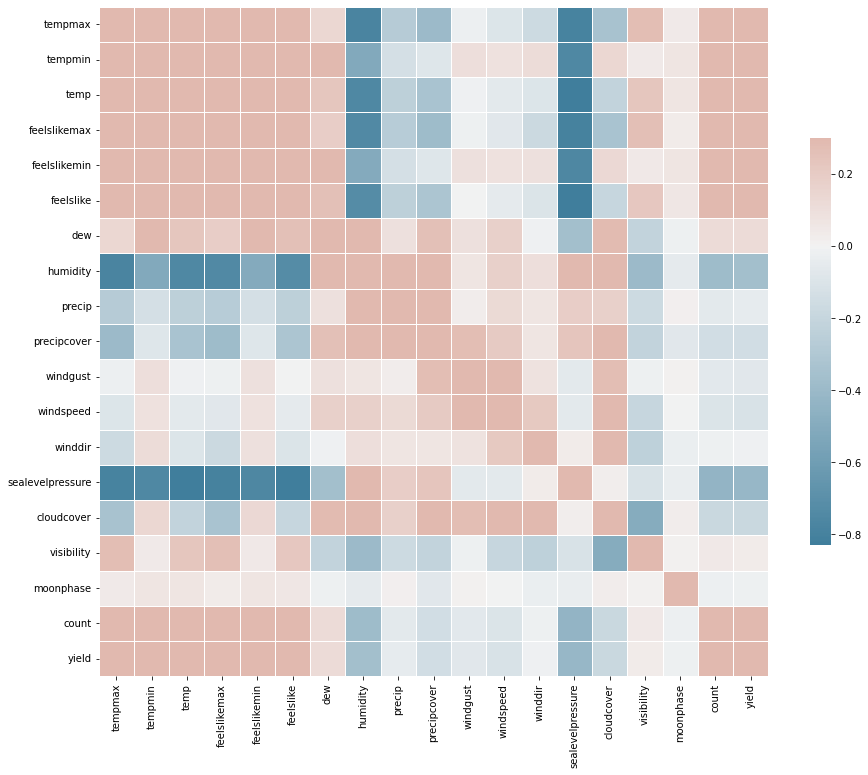

In [18]:
# Построение корреляционной матрицы
f = plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=False, cmap=cmap,vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<AxesSubplot:>

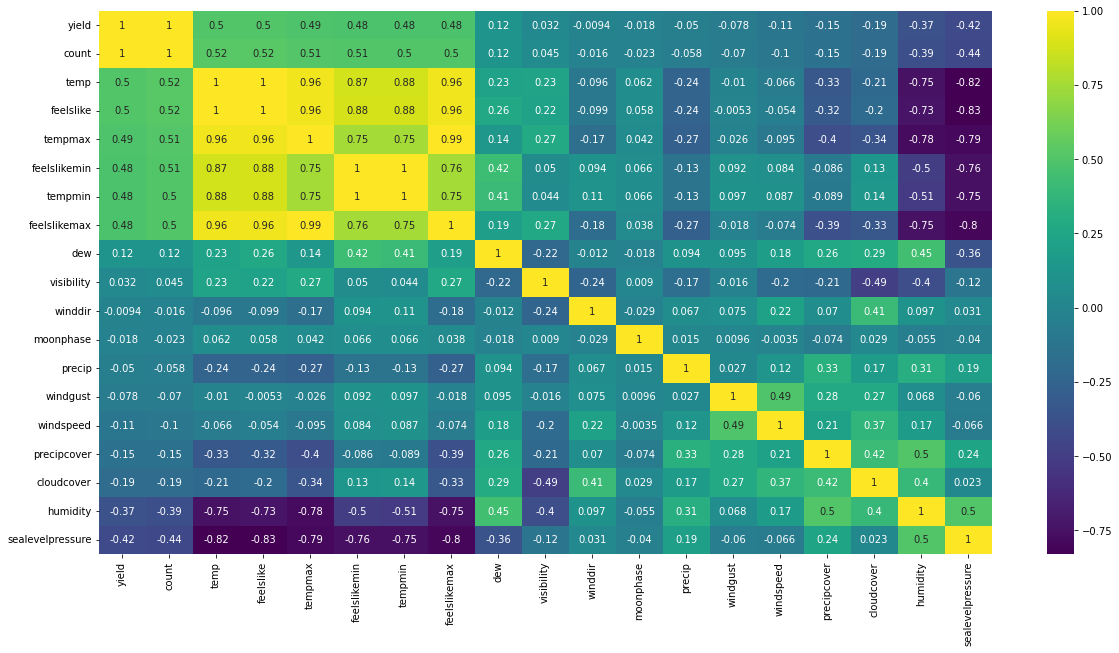

In [19]:
k = 100 #number of variables for heatmap
cols = df.corr().nlargest(k, 'yield')['yield'].index
cm = df[cols].corr()

plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 0 to 846
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          847 non-null    object 
 1   tempmax           847 non-null    float64
 2   tempmin           847 non-null    float64
 3   temp              847 non-null    float64
 4   feelslikemax      847 non-null    float64
 5   feelslikemin      847 non-null    float64
 6   feelslike         847 non-null    float64
 7   dew               847 non-null    float64
 8   humidity          847 non-null    float64
 9   precip            847 non-null    float64
 10  precipcover       847 non-null    float64
 11  windgust          838 non-null    float64
 12  windspeed         847 non-null    float64
 13  winddir           847 non-null    float64
 14  sealevelpressure  847 non-null    float64
 15  cloudcover        847 non-null    float64
 16  visibility        847 non-null    float64
 1

In [21]:
df.drop(['feelslike','tempmin','tempmax','feelslikemax','feelslikemin'], axis=1, inplace=True)

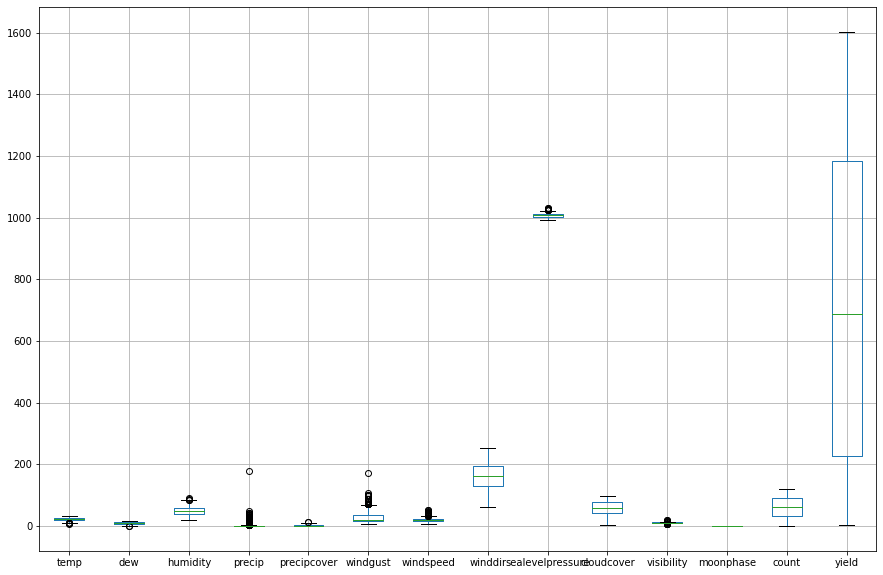

In [22]:
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].boxplot(figsize=[15,10]);

In [23]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

from collections import Counter
def detect_outliers(df,n,features):
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = df[col].quantile(0.25)
        # 3rd quartile (75%)
        Q3 = df[col].quantile(0.75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers  

# detect outliers 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin','feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       #'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       #'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       #'solarenergy', 'uvindex', 'severerisk', 'moonphase', 'count', 'yield'
Outliers_to_drop = detect_outliers(df,2,numerical_features)

In [24]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['temp', 'dew', 'humidity', 'precip', 'precipcover', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'moonphase', 'count', 'yield'],
      dtype='object')

## Drop outliers

In [25]:
df.loc[Outliers_to_drop].shape

(11, 19)

In [26]:
# Drop outliers
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

# Aggregate

In [27]:
from sklearn.base import TransformerMixin
class DateEncoder(TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        dt = X.dt
        return pd.concat([dt.year, dt.month, dt.day, dt.weekday], axis=1)


In [28]:
df['datetime'] = df['datetime'].astype('datetime64')


In [29]:
from sklearn_pandas import DataFrameMapper
mapper_dates = DataFrameMapper([('datetime', DateEncoder())],input_df=True,  df_out=True)
df1 = mapper_dates.fit_transform(df)

In [30]:
dtime = df.select_dtypes(include=['datetime64']).columns

In [31]:
df = pd.concat([df, df1], axis=1, join='inner')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          836 non-null    datetime64[ns]
 1   temp              836 non-null    float64       
 2   dew               836 non-null    float64       
 3   humidity          836 non-null    float64       
 4   precip            836 non-null    float64       
 5   precipcover       836 non-null    float64       
 6   windgust          827 non-null    float64       
 7   windspeed         836 non-null    float64       
 8   winddir           836 non-null    float64       
 9   sealevelpressure  836 non-null    float64       
 10  cloudcover        836 non-null    float64       
 11  visibility        836 non-null    float64       
 12  moonphase         836 non-null    float64       
 13  conditions        836 non-null    object        
 14  description       836 non-

In [33]:
df = df.drop(['datetime_0','datetime_3'],axis=1)

In [34]:
def check_freq(df = df, percent = 0.05):
    df_object_type = df.select_dtypes(include=['object','category'])
    for col in df_object_type.columns:
        label_freq = df_object_type[col].value_counts()/len(df_object_type)
        fig = label_freq.sort_values(ascending=False).plot.bar()
        fig.axhline(y=percent, color = 'red')
        fig.set_ylabel(f'Percentage of destination category of {col}')
        fig.set_xlabel('Destination')
        fig.set_title(f'{col} rare categories')
        plt.show()

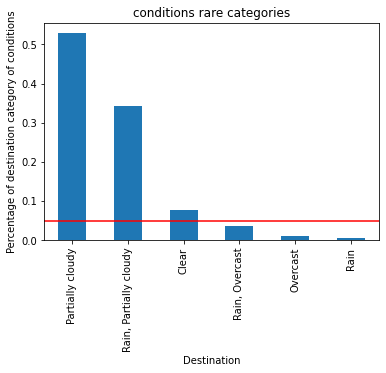

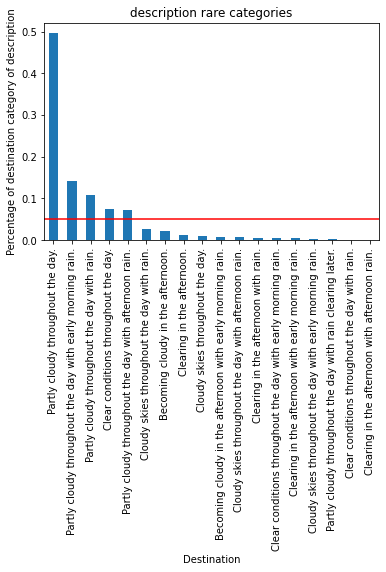

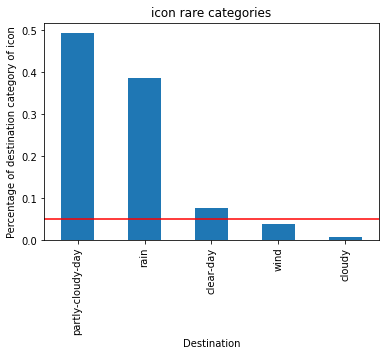

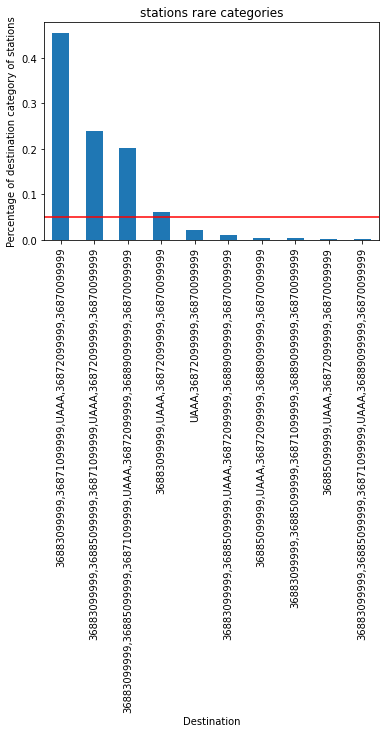

In [35]:
check_freq(df)

In [36]:
df = df.drop('count',axis=1)

In [37]:
df

,datetime,temp,dew,humidity,precip,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,conditions,description,icon,stations,yield,datetime_1,datetime_2
0,2015-05-01,14.9,5.1,53.68,0.00,0.00,18.0,12.7,243.7,1016.4,77.0,9.4,0.47,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"36883099999,36871099999,UAAA,36872099999,36870...",1.050277,5,1
1,2015-05-02,16.4,8.0,58.72,0.64,4.17,10.8,14.4,144.7,1017.3,92.4,9.7,0.49,"Rain, Overcast",Cloudy skies throughout the day with afternoon...,rain,"36883099999,36871099999,UAAA,36872099999,36870...",2.532258,5,2
2,2015-05-03,15.9,7.1,58.77,0.00,0.00,18.0,10.8,174.7,1017.5,80.7,8.9,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"36883099999,36871099999,UAAA,36872099999,36870...",3.534636,5,3
3,2015-05-04,17.2,4.4,45.89,0.00,0.00,10.8,21.6,127.9,1013.4,45.2,10.4,0.50,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"36883099999,36871099999,UAAA,36872099999,36870...",7.214687,5,4
4,2015-05-05,17.7,7.8,53.55,0.00,0.00,18.0,19.9,110.9,1010.9,85.4,10.2,0.51,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"36883099999,36871099999,UAAA,36872099999,36870...",12.295309,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2021-08-25,24.9,6.4,33.47,0.00,4.17,11.2,12.7,178.3,1010.1,43.6,11.0,0.55,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"36883099999,36885099999,36871099999,UAAA,36872...",1490.808549,8,25
832,2021-08-26,25.2,6.4,32.73,0.00,0.00,14.5,14.4,137.3,1007.8,63.3,11.6,0.59,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"36883099999,36885099999,36871099999,UAAA,36872...",1492.577912,8,26
833,2021-08-27,24.9,7.1,33.63,0.00,0.00,7.4,21.8,127.9,1007.1,63.4,11.1,0.63,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"36883099999,36885099999,36871099999,UAAA,36872...",1494.938146,8,27
834,2021-08-28,24.5,7.8,35.59,0.01,4.17,36.0,30.5,104.1,1008.1,73.9,10.3,0.67,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"36883099999,36885099999,36871099999,UAAA,36872...",1496.506239,8,28


# 5. Data Split

In [38]:
X = df.copy(deep = True)
X = X.drop('yield', axis=1)

y = df['yield']

In [39]:
Xmean, Xstd, ymean, ystd = X.mean(0), X.std(0), y.mean(), y.std()

In [40]:
yield_week = df.groupby(['datetime_2', 'datetime_1']).mean()

In [41]:
groups_yield_week_list = df['datetime_2'].copy().tolist()

from sklearn.utils import shuffle
X_shuffled, y_shuffled, groups_shuffled = shuffle(X, y, groups_yield_week_list, random_state=0)

from sklearn.model_selection import ShuffleSplit 

sss = ShuffleSplit(n_splits=1, train_size=0.3, random_state=0)

from sklearn.model_selection import GroupKFold
y
kf = GroupKFold(n_splits=3)

print(kf.get_n_splits(X, y, groups_yield_week_list))

for train_index, test_index in kf.split(X_shuffled, y_shuffled, groups_shuffled):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          836 non-null    datetime64[ns]
 1   temp              836 non-null    float64       
 2   dew               836 non-null    float64       
 3   humidity          836 non-null    float64       
 4   precip            836 non-null    float64       
 5   precipcover       836 non-null    float64       
 6   windgust          827 non-null    float64       
 7   windspeed         836 non-null    float64       
 8   winddir           836 non-null    float64       
 9   sealevelpressure  836 non-null    float64       
 10  cloudcover        836 non-null    float64       
 11  visibility        836 non-null    float64       
 12  moonphase         836 non-null    float64       
 13  conditions        836 non-null    object        
 14  description       836 non-

In [43]:
#y = df['yield']
#
#X = df.copy(deep = True)
#
##feature = ['datetime_1', 'datetime_2', 'datetime_3']
##feature = ['datetime_1','datetime_2','temp','dew','humidity','precip']
#feature = ['temp', 'dew', 'humidity', 'winddir', 'sealevelpressure', 'visibility', 'datetime_1', 'datetime_2', 'datetime_3','cloudcover','conditions','icon','description','stations']
#X = X[feature]

#Разделяем данные на тренировочные и тестовые
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.7, shuffle=False,random_state=0)

In [44]:
from sklearn.model_selection import ShuffleSplit
sss = ShuffleSplit(n_splits=1, train_size=0.3, random_state=0)

train_index, val_index = next(iter(sss.split(X, y)))
X_train, X_test = X.iloc[train_index], X.iloc[val_index]
y_train, y_test = y.iloc[train_index], y.iloc[val_index]

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 508 to 684
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          250 non-null    datetime64[ns]
 1   temp              250 non-null    float64       
 2   dew               250 non-null    float64       
 3   humidity          250 non-null    float64       
 4   precip            250 non-null    float64       
 5   precipcover       250 non-null    float64       
 6   windgust          248 non-null    float64       
 7   windspeed         250 non-null    float64       
 8   winddir           250 non-null    float64       
 9   sealevelpressure  250 non-null    float64       
 10  cloudcover        250 non-null    float64       
 11  visibility        250 non-null    float64       
 12  moonphase         250 non-null    float64       
 13  conditions        250 non-null    object        
 14  description       250 no

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((250, 19), (586, 19), (250,), (586,))

# 6. Предварительная обработки (PreProcessing Pipeline)
В предварительной обработке мы позаботимся о пропущенных значениях, масштабируем числовые признаки и разумно объединяем категориальные признаки со многими классами.

Вменение отсутствующих значений. Существуют различные сложные методы вменения, такие как среднее значение, медиана и вменение KNN. Однако мы хотим каким-то образом сообщить модели, что у нас нет доступной информации для этой конкретной функции данных. Вот почему я бы использовал вменение постоянного значения для числовых и строковых функций. Где 0 будет использоваться в качестве вмененного значения для числовых и «Отсутствует» для строковых функций.

Кодирование категориальных функций: нам также необходимо обратиться к категориальным функциям. Большинство категориальных признаков в этой задаче имеют строковую природу, представляющую разные классы. Кодирование категориальных признаков всегда является хорошим выбором. Однако недостатком кодировщиков, использующих порядковое или числовое кодирование, является то, что эта модель будет присваивать больший вес классам с более высокими значениями и меньший вес классам с низкими значениями. Чтобы избежать этого, мы будем использовать oneHotEncoding, где каждый класс будет представлен в виде отдельного столбца, а значение 0/1 будет указывать на их наличие.

Для категориальных признаков с большим количеством классов мы хорошо объединяем похожие классы в бины и далее горячекодируем их.

Числовые характеристики:

Для числовых признаков после вменения нам нужно будет применить какую-то стандартизацию, поскольку они лежат в разных масштабах. Мы бы использовали масштабирование minmax, которое преобразовало бы их в диапазон от 0 до 1.

In [47]:
#from sklearn.compose import make_column_selector
#
#cat_selector = make_column_selector(dtype_include=object)
#num_selector = make_column_selector(dtype_include=np.number)
#
#from sklearn.pipeline import Pipeline
#ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
#
#cat_linear_processor = Pipeline([
#    ('SimpleImputer', SimpleImputer(strategy='most_frequent')),
#    ('OneHotEncoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
#    ('StandardScaler', StandardScaler())
#])
#
#num_linear_processor = Pipeline([
#    ('SimpleImputer', SimpleImputer(strategy='mean')),  
#    ('StandardScaler', StandardScaler())
#])
#
#
#from sklearn.compose import ColumnTransformer
#ct = ColumnTransformer([
#    ("num",num_linear_processor,num_selector),
#    ("cat",cat_linear_processor,cat_selector)
#])

In [48]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn_pandas import DataFrameMapper, features_generator
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest

categorical_features = X_train.select_dtypes(include=['object','category']).columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
boolean_features = X_train.select_dtypes(include=['bool']).columns
cat = [([c], [SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse=False, handle_unknown='ignore')]) for c in categorical_features]
num = [([n], [SimpleImputer(strategy='mean'),MinMaxScaler()]) for n in numerical_features]

boolean = [([b], [OneHotEncoder(sparse=False, handle_unknown='ignore')]) for b in boolean_features]

ct = DataFrameMapper(num + cat + boolean, input_df=True,df_out=True)

best n_neighbours = 1


<AxesSubplot:>

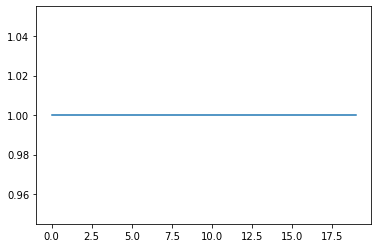

In [49]:
# from https://www.kaggle.com/code/rajivramchandani/churn-prediction-using-classification-models
from sklearn.neighbors import KNeighborsRegressor
best_knn = []
error = []
ct.fit(X_train)
X_train_scaled = ct.transform(X_train)
X_test_scaled = ct.transform(X_test)


best_knn = []
error = [] 
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_scaled, y_train)  
    pred = model.predict(X_test_scaled) 
    error.append(np.mean(pred != y_test))
    best_knn.insert(K, model.score(X_test_scaled,y_test))

# Get the best fitting number of neighbours 
for i,v in enumerate(best_knn):
    if v == max(best_knn):
        print(f'best n_neighbours = {i}')
        
curve = pd.Series(error) #elbow curve 
curve.plot()

## Change selected feature

In [50]:
ct.fit(X_train)
X_train_scaled = ct.transform(X_train)
X_test_scaled = ct.transform(X_test)
X_scaled = ct.transform(X)

k = 100 #number of variables for heatmap
cols = X_scaled.corr().index
cm = X_scaled[cols].corr()

plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [51]:
#feature selected 2
#feature = ['temp', 'dew', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir',
#       'sealevelpressure', 'cloudcover', 'visibility', 'moonphase',
#       'datetime_1', 'datetime_2',
#       'description_x0_Clearing in the afternoon with early morning rain.',
#       'stations_x0_36883099999,36871099999,UAAA,36872099999,36870099999',
#       'stations_x0_36883099999,36885099999,36871099999,UAAA,36872099999,36889099999,36870099999',
#       'stations_x0_36883099999,UAAA,36872099999,36870099999']
#feature selected 1
#feature = ['temp', 'dew', 'humidity', 'precipcover', 'windgust', 'winddir',
#       'sealevelpressure', 'cloudcover', 'datetime_1', 'datetime_2',
#       'conditions_x0_Partially cloudy',
#       'conditions_x0_Rain, Overcast', 'conditions_x0_Rain, Partially cloudy',
#       'description_x0_Partly cloudy throughout the day with rain.',
#       'description_x0_Partly cloudy throughout the day.',
#       'icon_x0_partly-cloudy-day', 'icon_x0_rain',
#       'stations_x0_36883099999,36885099999,36871099999,UAAA,36872099999,36870099999',
#       'stations_x0_36883099999,UAAA,36872099999,36870099999']
# feature = ['temp', 'dew', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir',
#        'sealevelpressure', 'cloudcover', 'visibility', 'moonphase',
#        'datetime_1', 'datetime_2',
#        'description_x0_Clearing in the afternoon with early morning rain.',
#        'stations_x0_36883099999,36871099999,UAAA,36872099999,36870099999',
#        'stations_x0_36883099999,36885099999,36871099999,UAAA,36872099999,36889099999,36870099999',
#        'stations_x0_36883099999,UAAA,36872099999,36870099999']
feature = ['temp', 'dew', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'moonphase',
       'datetime_1', 'datetime_2']
X_train = X_train_scaled[feature]
X_test = X_test_scaled[feature]
X = X_scaled[feature]

In [52]:
feature = ['temp', 'dew', 'humidity', 'precipcover', 'windgust', 'winddir', 'sealevelpressure', 'cloudcover', 'datetime_1', 'datetime_2', 'conditions_x0_Partially cloudy', 'conditions_x0_Rain, Overcast', 'conditions_x0_Rain, Partially cloudy', 'description_x0_Partly cloudy throughout the day with rain.', 'description_x0_Partly cloudy throughout the day.', 'icon_x0_partly-cloudy-day', 'icon_x0_rain', 'stations_x0_36883099999,36885099999,36871099999,UAAA,36872099999,36870099999', 'stations_x0_36883099999,UAAA,36872099999,36870099999']

'temp', 'dew', 'humidity', 'winddir', 'sealevelpressure', 'visibility',
       'datetime_1', 'datetime_2', 'datetime_3', 'icon_x0_rain'

'temp', 'humidity', 'sealevelpressure', 'cloudcover', 'datetime_1',
       'datetime_2', 'datetime_3', 'conditions_x0_Partially cloudy',
       'icon_x0_partly-cloudy-day'

'temp', 'dew', 'humidity', 'winddir', 'sealevelpressure', 'moonphase',
       'datetime_0', 'datetime_1', 'datetime_2', 'datetime_3'

'temp', 'dew', 'humidity', 'winddir', 'sealevelpressure', 'moonphase',
       'datetime_0', 'datetime_1', 'datetime_2', 'datetime_3'

'precip', 'precipcover', 'windgust', 'windspeed', 'cloudcover',
       'datetime_0', 'datetime_1', 'datetime_2',
       'description_x0_Cloudy skies throughout the day with afternoon rain.'

'temp', 'datetime_0', 'datetime_1', 'datetime_2', 'datetime_3',
       'conditions_x0_Rain',
       'description_x0_Becoming cloudy in the afternoon with early morning rain.',
       'description_x0_Cloudy skies throughout the day with afternoon rain.',
       'stations_x0_36883099999,36885099999,36871099999,36889099999,36870099999'

In [53]:
feature = ['temp', 'dew', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'moonphase',
       'datetime_1', 'datetime_2',
       'description_x0_Clearing in the afternoon with early morning rain.',
       'stations_x0_36883099999,36871099999,UAAA,36872099999,36870099999',
       'stations_x0_36883099999,36885099999,36871099999,UAAA,36872099999,36889099999,36870099999',
       'stations_x0_36883099999,UAAA,36872099999,36870099999']

In [54]:
len(feature)

17

In [55]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn_pandas import DataFrameMapper, features_generator
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest

categorical_features = X_train.select_dtypes(include=['object','category']).columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
boolean_features = X_train.select_dtypes(include=['bool']).columns
cat = [([c], [SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse=False, handle_unknown='ignore')]) for c in categorical_features]
num = [([n], [SimpleImputer(strategy='mean')]) for n in numerical_features]

boolean = [([b], [OneHotEncoder(sparse=False, handle_unknown='ignore')]) for b in boolean_features]

ct = DataFrameMapper(num + cat + boolean, input_df=True,df_out=True)

### Best kfold

In [56]:
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest
def kbest_pipe(X_train, y_train, score_func = mutual_info_regression, k = 6):
    
    X_new = SelectKBest(score_func = score_func, k=k)
    
    pipe = Pipeline([
    ('ColumnTransformer', ct),
    ('Kbest',X_new)
    ])
    
    pipe.fit(X_train,y_train)
    X_train_scaled = pipe.named_steps['ColumnTransformer'].transform(X_train)
    X_test_scaled = pipe.named_steps['ColumnTransformer'].transform(X_train)
    
    X_train_kbest = pipe.transform(X_train)
    X_test_kbest = pipe.transform(X_test)
    
    name_bool = pipe.named_steps['Kbest'].get_support() 
    
    name = pipe.named_steps['ColumnTransformer'].transformed_names_
    
    X_train_kbest = pd.DataFrame(X_train_kbest)
    X_test_kbest = pd.DataFrame(X_test_kbest)
    X_train_kbest.columns = X_train_scaled.columns[name_bool]
    X_test_kbest.columns = X_test_scaled.columns[name_bool]
    
    print(X_train_scaled.columns[name_bool])

    return X_train_kbest, X_test_kbest

In [57]:
#X_train_k, X_test_k = kbest_pipe(X,y,mutual_info_regression, k=17)

In [58]:
#X_train_k, X_test_k = kbest_pipe(X,y,f_regression, k=17)
#X_train_k, X_test_k

### RFE

In [59]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
def rfe_pipe(X_train, y_train, k = 6,step=1):
    X_new = RFE(estimator= GradientBoostingRegressor(random_state =0), n_features_to_select=k, step = step)
    
    pipe = Pipeline([
    ('ColumnTransformer', ct),
    ('RFE',X_new)
    ])
    
    pipe.fit(X_train,y_train)
    X_train_scaled = pipe.named_steps['ColumnTransformer'].transform(X_train)
    X_test_scaled = pipe.named_steps['ColumnTransformer'].transform(X_train)
    
    X_train_kbest = pipe.transform(X_train)
    X_test_kbest = pipe.transform(X_test)
    
    name_bool = pipe.named_steps['RFE'].get_support() 
    
    name = pipe.named_steps['ColumnTransformer'].transformed_names_
    
    X_train_kbest = pd.DataFrame(X_train_kbest)
    X_test_kbest = pd.DataFrame(X_test_kbest)
    X_train_kbest.columns = X_train_scaled.columns[name_bool]
    X_test_kbest.columns = X_test_scaled.columns[name_bool]
    
    print(X_train_scaled.columns[name_bool])
    print(type(pipe.named_steps['RFE'].ranking_ ==1))
    return X_train_kbest, X_test_kbest

In [60]:
#X_train_k, X_test_k = rfe_pipe(X_train, y_train, k = 17,step=2)

### RFECV

In [61]:
from sklearn.feature_selection import RFECV

def rfecv_pipe(X_train, y_train,scoring='r2', k = 1,step=1,cv=sss):
    X_new = RFECV(estimator= GradientBoostingRegressor(random_state =0),cv=cv, min_features_to_select=k,step=step, scoring=scoring, n_jobs=-1)
    
    pipe = Pipeline([
    ('ColumnTransformer', ct),
    ('RFE',X_new)
    ])
    pipe.fit(X_train,y_train)
    X_train_scaled = pipe.named_steps['ColumnTransformer'].transform(X_train)
    X_test_scaled = pipe.named_steps['ColumnTransformer'].transform(X_train)
    
    X_train_kbest = pipe.transform(X_train)
    X_test_kbest = pipe.transform(X_test)
    
    name_bool = pipe.named_steps['RFE'].get_support() 
    
    name = pipe.named_steps['ColumnTransformer'].transformed_names_
    
    X_train_kbest = pd.DataFrame(X_train_kbest)
    X_test_kbest = pd.DataFrame(X_test_kbest)
    X_train_kbest.columns = X_train_scaled.columns[name_bool]
    X_test_kbest.columns = X_test_scaled.columns[name_bool]
    
    
    print("Optimal number of features : %d" % pipe.named_steps['RFE'].n_features_)
    print(X_train_scaled.columns[name_bool])
    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (accuracy)")
    plt.plot(
        range(k, len(pipe.named_steps['RFE'].grid_scores_) + k),
        pipe.named_steps['RFE'].grid_scores_,
    )
    plt.show()
    
    print(pipe.named_steps['RFE'].ranking_)
    print(name_bool)
    return X_train_kbest, X_test_kbest

In [62]:
#X_train_kbest, X_test_kbest = rfecv_pipe(X, y,'neg_mean_squared_error', k = 1,step=1,)

### SequentialFeatureSelector

In [63]:
from sklearn.feature_selection import SequentialFeatureSelector

def sfs_pipe(X_train, y_train,scoring='r2', k = 6,direction = 'forward'):
    X_new = SequentialFeatureSelector(estimator= GradientBoostingRegressor(random_state =0),direction=direction, cv=sss,n_features_to_select=k, scoring=scoring, n_jobs=-1)
    
    pipe = Pipeline([
    ('ColumnTransformer', ct),
    ('RFE',X_new)
    ])
    
    pipe.fit(X_train,y_train)
    X_train_scaled = pipe.named_steps['ColumnTransformer'].transform(X_train)
    X_test_scaled = pipe.named_steps['ColumnTransformer'].transform(X_train)
    
    X_train_kbest = pipe.transform(X_train)
    X_test_kbest = pipe.transform(X_test)
    
    name_bool = pipe.named_steps['RFE'].get_support() 
    
    name = pipe.named_steps['ColumnTransformer'].transformed_names_
    
    X_train_kbest = pd.DataFrame(X_train_kbest)
    X_test_kbest = pd.DataFrame(X_test_kbest)
    X_train_kbest.columns = X_train_scaled.columns[name_bool]
    X_test_kbest.columns = X_test_scaled.columns[name_bool]
    
    print(X_train_scaled.columns[name_bool])
    return X_train_kbest, X_test_kbest

In [64]:
#X_train_kbest, X_test_kbest = sfs_pipe(X, y,'r2', k = 16,direction='backward')

In [65]:
#X_train_kbest, X_test_kbest = sfs_pipe(X, y,'r2', k = 16,direction='forward')

In [66]:
#Linear Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
#Tree-based models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost.sklearn as xbg


# Models

#Linear Models
lasso_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', Lasso())
])

linreg_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', LinearRegression(n_jobs=-1))
])

ridge_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', Ridge(
        random_state=0))
])

elsticnet_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', ElasticNet(
        random_state=0))
])

sgdreg_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', SGDRegressor(
        random_state=0))
])

#Tree-based models

rf_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', RandomForestRegressor(
        n_jobs=-1,
        random_state=0))
])

dt_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', DecisionTreeRegressor(
        random_state=0))
])

gbdt_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', GradientBoostingRegressor(
        random_state=0))
])
xgb_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', xbg.XGBRegressor(
        random_state=0))
])

#Linear Models
lasso_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', Lasso(
        alpha=0.1,
        max_iter=500))
])

linreg_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', LinearRegression(n_jobs=-1))
])

ridge_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', Ridge(
        alpha=0.1,
        max_iter=500,
        random_state=0))
])

elsticnet_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', ElasticNet(
        alpha=0.009899999999999999,
        l1_ratio=0.9499999999999995,                               
        random_state=0))
])

sgdreg_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', SGDRegressor(
        max_iter=700, 
        random_state=0))
])

#Tree-based models

rf_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', RandomForestRegressor(
        max_depth=9,
        n_estimators=60,
        n_jobs=-1,
        random_state=0))
])

dt_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', DecisionTreeRegressor(
        max_depth=6,
        min_samples_leaf=4,
        random_state=0))
])

gbdt_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', GradientBoostingRegressor(
        max_depth=4,
        min_samples_leaf=3, 
        n_estimators=200,
        random_state=0,
        subsample=0.5))
])
xgb_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', xbg.XGBRegressor(
        gamma= 0.7,
        learning_rate= 0.2,
        max_depth= 6,
        n_estimators= 170,
        subsample= 0.9,
        random_state=0,
        n_jobs=-1 ))
])

# select feature 1
#Linear Models
lasso_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', Lasso(
        alpha=0.1,
        max_iter=500))
])

linreg_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', LinearRegression(n_jobs=-1))
])

ridge_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', Ridge(
        alpha=0.0001,
        max_iter=500,
        random_state=0))
])

elsticnet_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', ElasticNet(
        alpha=0.0001,
        l1_ratio=0.9899999999999995,
        random_state=0))
])

sgdreg_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', SGDRegressor(
        max_iter=700,
        random_state=0))
])

#Tree-based models

rf_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', RandomForestRegressor(
        max_depth=8,
        n_estimators=150,
        n_jobs=-1,
        random_state=0))
])

dt_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', DecisionTreeRegressor(
        max_depth=6,
        min_samples_leaf=3,
        random_state=0))
])

gbdt_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', GradientBoostingRegressor(
        max_depth=4,
        min_samples_leaf=2,
        n_estimators=90,
        random_state=0,
        subsample=0.5))
])
xgb_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', xbg.XGBRegressor(
        gamma = 0.5,
        learning_rate = 0.2,
        max_depth = 6,
        n_estimators = 90,
        subsample = 0.9,
        random_state=0))
])

# select feature 2

In [67]:
# select feature 2
#Linear Models
lasso_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', Lasso(
        alpha=0.1,
        max_iter=500,
        tol=0.001))
])

linreg_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', LinearRegression(n_jobs=-1))
])

ridge_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', Ridge(
        alpha=0.0001,
        max_iter=500,
        random_state=0))
])

elsticnet_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', ElasticNet(
        alpha=0.0001,
        l1_ratio=0.9899999999999995,
        random_state=0))
])

sgdreg_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', SGDRegressor(
        max_iter=700,
        random_state=0))
])

#Tree-based models

rf_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', RandomForestRegressor(
        max_depth=18,
        n_estimators=60,
        n_jobs=-1,
        random_state=0))
])

dt_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', DecisionTreeRegressor(
        max_depth=6,
        min_samples_leaf=4,
        random_state=0))
])

gbdt_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', GradientBoostingRegressor(
        max_depth=4,
        min_samples_leaf=2,
        n_estimators=150,
        random_state=0,
        subsample=0.5))
])
xgb_pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('model', xbg.XGBRegressor(
        gamma = 0.5,
        learning_rate = 0.2,
        max_depth = 6,
        n_estimators = 150,
        subsample = 0.9,
        random_state=0))
])

### Param for GridSearch

In [68]:
ridge_param_grid = {
    'model__alpha': [0.001,0.02,0.1,1,0.0001],
    'model__max_iter': [500, 700, 900, 1100, 1500, 2000],
    'model__tol': [0.001, 0.002,0.005,0.0001],
}

In [69]:
elasticnet_param_grid = {
    'model__alpha': np.arange(0.0001,  0.01, 0.0001),
    'model__l1_ratio': np.arange(0.1,  1, 0.01)
}

In [70]:
lasso_param_grid = {
    'model__alpha': [0.001,0.02,0.1,1,0.0001],
    'model__max_iter': [500, 700, 900, 1100, 1500, 2000],
    'model__tol': [0.001, 0.002,0.005,0.0001],
}

In [71]:
sgdreg_param_grid = {
    'model__max_iter': [500, 700, 900, 1100, 1500, 2000],
    'model__tol': [0.001, 0.002,0.005,0.0001],
}

In [72]:
dt_param_grid = {
    'model__max_depth': np.arange(1,  25, 1),
    'model__min_samples_split': np.arange(2, 6, 1),
    'model__min_samples_leaf': np.arange(1, 6, 1)
}

In [73]:
rf_param_grid = {
    'model__max_depth': np.arange(1,  25, 1),
    'model__n_estimators': [10,15,30,60,90,150,170,200],
    'model__min_samples_leaf': np.arange(1, 6, 1)
}

In [74]:
gb_param_grid_pipe = {
    'model__max_depth': np.arange(1,  25, 1),
    'model__n_estimators': [10,15,30,60,90,150,170,200],
    'model__min_samples_leaf': np.arange(2, 4, 1),
    'model__learning_rate': [0.1, 0.2, 0.01],
    'model__subsample'    : [0.9, 0.5, 0.2, 0.1],
    
}

In [75]:
xgb_param_grid_pipe = {
    'model__max_depth': np.arange(1,  25, 1),
    'model__n_estimators': [10,15,30,60,90,150,170,200],
    'model__learning_rate': [0.1, 0.2, 0.01],
    'model__gamma': [0.3, 0.5, 0.7],
    'model__subsample'    : [0.9, 0.5, 0.2, 0.1],
    
}

### estimators

In [76]:
estimators = [
    #Linear Models
    ('LinearRegression', linreg_pipeline),
    ("Lasso", lasso_pipeline),   
    ('Ridge', ridge_pipeline),
    ('ElasticNet', elsticnet_pipeline),
    ('SGDRegressor', sgdreg_pipeline),
    #Tree-based models
    ('RandomForestRegressor', rf_pipeline),
    ('DecisionTreeRegressor', dt_pipeline),
    ('GradientBoostingRegressor', gbdt_pipeline),
    ('xgb', xgb_pipeline)
]

In [77]:
from sklearn.model_selection import cross_val_score
def model_performance(X,y,models):
    for name, model in models:
        cv = cross_val_score(model,X,y,cv=sss,n_jobs=-1)
        print(f'{name !r:30} : {np.mean(cv)}')

## cross_val_score

In [78]:
%time model_performance(X_train,y_train,estimators)

'LinearRegression'             : 0.9924377597117522
'Lasso'                        : 0.9927677188858326
'Ridge'                        : 0.9924387600708644
'ElasticNet'                   : 0.9924396376283671
'SGDRegressor'                 : 0.9901076695268055
'RandomForestRegressor'        : 0.9912283925826835
'DecisionTreeRegressor'        : 0.9903365051388231
'GradientBoostingRegressor'    : 0.9871916273092418
'xgb'                          : 0.9945286014719952
CPU times: total: 62.5 ms
Wall time: 10.9 s


In [79]:
all_models =[]

# Lasso

In [80]:
model = lasso_pipeline

In [81]:
%time model.fit(X_train,y_train)
all_models.append(model)

CPU times: total: 31.2 ms
Wall time: 32.1 ms


In [82]:
from sklearn.metrics import mean_absolute_percentage_error
def evaluate(pipeline, X_train, X_test, y_train, y_test):
    pipeline.fit(X_train, y_train)
    
    score1 = pipeline.score(X_train, y_train)
    score2 = pipeline.score(X_test, y_test)
    print(f'score(X_train,y_train){score1.mean():.5f}+/-{score1.std():.10f}')
    
    print(f'score(X_test,y_test){score2.mean():.5f}+/-{score2.std():.10f}')
    try:
        y_train_predicted = pipeline.predict(X_train)
        y_test_predicted_pruned_trees = pipeline.predict(X_test)
    except:
        y_train_predicted = pipeline.predict_proba(X_train)
        y_test_predicted_pruned_trees = pipeline.predict_proba(X_test)
        
    mse_train = mean_squared_error(y_train, y_train_predicted)
    mse_test = mean_squared_error(y_test, y_test_predicted_pruned_trees)

    mae_train = mean_absolute_error(y_train, y_train_predicted)
    mae_test = mean_absolute_error(y_test, y_test_predicted_pruned_trees)

    mape_train = mean_absolute_percentage_error(y_train, y_train_predicted)
    mape_test = mean_absolute_percentage_error(y_test, y_test_predicted_pruned_trees)    
    print("Train MSE: {} Test MSE: {}".format(mse_train, mse_test))
    print("Train MAE: {} Test MAE: {}".format(mae_train, mae_test))
    print("Train MAPE: {} Test MAPE: {}".format(mape_train, mape_test))

    r2_train = r2_score(y_train, y_train_predicted)
    r2_test = r2_score(y_test, y_test_predicted_pruned_trees)

    print("Train R2: {} Test R2: {}".format(r2_train, r2_test))
    try:
        predicts = pipeline.predict_proba(X)
    except:
        predicts = pipeline.predict(X)
    print('predict X')
    print('MSE: ', mean_squared_error(y,predicts))
    print('MAE: ', mean_absolute_error(y,predicts))
    print('R2: ', r2_score(y,predicts))
    
    print('Visualization predict X')
    plt.xlabel('', fontsize=60)
    plt.ylabel('', fontsize=60)
    plt.scatter(df['yield'],df['yield'], color ='red', marker='*')
    try:
        plt.scatter(df['yield'], pipeline.predict_proba(X),color='blue',linestyle='-.')
    except:
        plt.scatter(df['yield'], pipeline.predict(X),color='blue',linestyle='-.')
    
    #print('Visualization predict test')
    #plt.xlabel('', fontsize=60)
    #plt.ylabel('', fontsize=60)
    #plt.scatter(df['yield'],df['yield'], color ='red', marker='*')
    #plt.scatter(y_test, pipeline.predict(X_test),color='blue',linestyle='-.')

In [83]:
from sklearn.metrics import mean_absolute_percentage_error
def evaluate(pipeline, X_train, X_test, y_train, y_test):
    pipeline.fit(X_train, y_train)
    
    
    print(f'score(X_train,y_train){pipeline.score(X_train, y_train)}')
    
    print(f'score(X_test,y_test){pipeline.score(X_test, y_test)}')
    try:
        y_train_predicted = pipeline.predict(X_train)
        y_test_predicted_pruned_trees = pipeline.predict(X_test)
    except:
        y_train_predicted = pipeline.predict_proba(X_train)
        y_test_predicted_pruned_trees = pipeline.predict_proba(X_test)
        
    mse_train = mean_squared_error(y_train, y_train_predicted)
    mse_test = mean_squared_error(y_test, y_test_predicted_pruned_trees)

    mae_train = mean_absolute_error(y_train, y_train_predicted)
    mae_test = mean_absolute_error(y_test, y_test_predicted_pruned_trees)

    mape_train = mean_absolute_percentage_error(y_train, y_train_predicted)
    mape_test = mean_absolute_percentage_error(y_test, y_test_predicted_pruned_trees)    
    print("Train MSE: {} Test MSE: {}".format(mse_train, mse_test))
    print("Train MAE: {} Test MAE: {}".format(mae_train, mae_test))
    print("Train MAPE: {} Test MAPE: {}".format(mape_train, mape_test))

    r2_train = r2_score(y_train, y_train_predicted)
    r2_test = r2_score(y_test, y_test_predicted_pruned_trees)

    print("Train R2: {} Test R2: {}".format(r2_train, r2_test))
    try:
        predicts = pipeline.predict_proba(X)
    except:
        predicts = pipeline.predict(X)
    print('predict X')
    print('MSE: ', mean_squared_error(y,predicts))
    print('MAE: ', mean_absolute_error(y,predicts))
    print('R2: ', r2_score(y,predicts))
    
    print('Visualization predict X')
    plt.xlabel('', fontsize=60)
    plt.ylabel('', fontsize=60)
    plt.scatter(df['yield'],df['yield'], color ='red', marker='*')
    try:
        plt.scatter(df['yield'], pipeline.predict_proba(X),color='blue',linestyle='-.')
    except:
        plt.scatter(df['yield'], pipeline.predict(X),color='blue',linestyle='-.')
    
    #print('Visualization predict test')
    #plt.xlabel('', fontsize=60)
    #plt.ylabel('', fontsize=60)
    #plt.scatter(df['yield'],df['yield'], color ='red', marker='*')
    #plt.scatter(y_test, pipeline.predict(X_test),color='blue',linestyle='-.')

## Evaluate

score(X_train,y_train)0.9941355339276533
score(X_test,y_test)0.9935342328527065
Train MSE: 1438.0618669586643 Test MSE: 1664.6305777880816
Train MAE: 29.711230607897704 Test MAE: 31.86431891970729
Train MAPE: 1.4461040877652271 Test MAPE: 1.7365325935800777
Train R2: 0.9941355339276533 Test R2: 0.9935342328527065
predict X
MSE:  1596.8767767027296
MAE:  31.220452797754664
R2:  0.9937084215766453
Visualization predict X


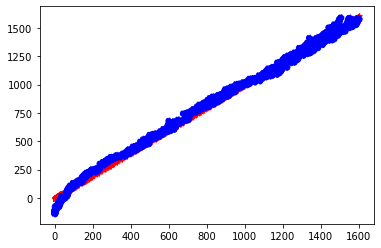

In [84]:
evaluate(model, X_train, X_test, y_train, y_test)

# LinearRegression

In [85]:
model = linreg_pipeline

In [86]:
%time model.fit(X_train,y_train)
all_models.append(model)

CPU times: total: 31.2 ms
Wall time: 31 ms


In [87]:
model.named_steps.model.predict

<bound method LinearModel.predict of LinearRegression(n_jobs=-1)>

## Evaluate

score(X_train,y_train)0.9941780329403889
score(X_test,y_test)0.9935444876407831
Train MSE: 1427.6404221341013 Test MSE: 1661.9904527399203
Train MAE: 29.339819840082964 Test MAE: 31.629095031943866
Train MAPE: 1.4527949213621199 Test MAPE: 1.7322547992667874
Train R2: 0.9941780329403889 Test R2: 0.9935444876407831
predict X
MSE:  1591.909701960668
MAE:  30.9445031683491
R2:  0.9937279914900727
Visualization predict X


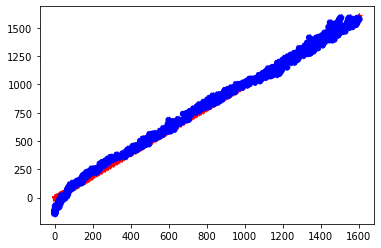

In [88]:
evaluate(model, X_train, X_test, y_train, y_test)

In [89]:
model.named_steps['model'].coef_

array([-146.65010461,   36.26725813,  -52.18750681,   37.59337229,
        -18.92028853,  -10.65895526,   19.05759647,  -72.79919051,
        -13.49827635,   -3.53785113,    7.80358011, 1352.15184029,
        407.46124709])

In [90]:
model.named_steps['model'].intercept_

-32.772688415347716

# Ridge

In [91]:
model = ridge_pipeline

In [92]:
%time model.fit(X_train,y_train)
all_models.append(model)

CPU times: total: 31.2 ms
Wall time: 28 ms


## Evaluate

score(X_train,y_train)0.9941780328930891
score(X_test,y_test)0.9935444509506486
Train MSE: 1427.6404337327476 Test MSE: 1661.9998987218762
Train MAE: 29.34012298283817 Test MAE: 31.629541440552877
Train MAPE: 1.4527690185690985 Test MAPE: 1.7322414410442522
Train R2: 0.9941780328930891 Test R2: 0.9935444509506486
predict X
MSE:  1591.916326655749
MAE:  30.94490673429849
R2:  0.9937279653892557
Visualization predict X


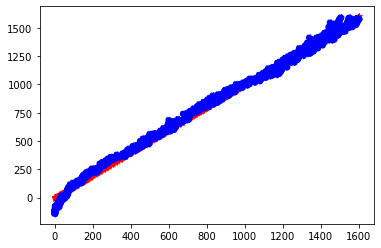

In [93]:
evaluate(model, X_train, X_test, y_train, y_test)

# ElasticNET

In [94]:
model = elsticnet_pipeline

In [95]:
%time model.fit(X_train,y_train)
all_models.append(model)

CPU times: total: 31.2 ms
Wall time: 31.2 ms


## Evaluate

score(X_train,y_train)0.994178031774872
score(X_test,y_test)0.993544188210515
Train MSE: 1427.6407079376775 Test MSE: 1662.0675419342597
Train MAE: 29.341145662983607 Test MAE: 31.63118930281066
Train MAPE: 1.4526850200227894 Test MAPE: 1.7322615929377967
Train R2: 0.994178031774872 Test R2: 0.993544188210515
predict X
MSE:  1591.9638236338465
MAE:  30.946367640182956
R2:  0.9937277782546146
Visualization predict X


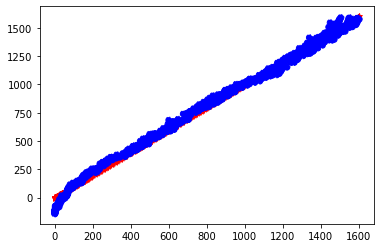

In [96]:
evaluate(model, X_train, X_test, y_train, y_test)

# SGDRegressor

In [97]:
model = sgdreg_pipeline

In [98]:
%time model.fit(X_train,y_train)
all_models.append(model)

CPU times: total: 46.9 ms
Wall time: 39.7 ms


## Evaluate

score(X_train,y_train)0.9938717993572308
score(X_test,y_test)0.9934158057147379
Train MSE: 1502.7338463075748 Test MSE: 1695.1199892703646
Train MAE: 30.877540840053854 Test MAE: 32.318403447288425
Train MAPE: 1.470601876818141 Test MAPE: 1.6928537524373528
Train R2: 0.9938717993572308 Test R2: 0.9934158057147379
predict X
MSE:  1637.5882479537408
MAE:  31.88752348101015
R2:  0.9935480213392301
Visualization predict X


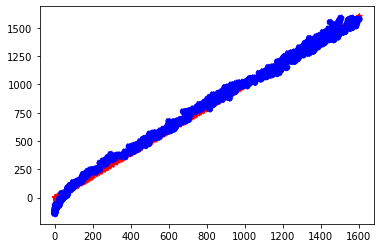

In [99]:
evaluate(model, X_train, X_test, y_train, y_test)

# RandomForestRegressor

In [100]:
X_train.columns

Index(['temp', 'dew', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'moonphase',
       'datetime_1', 'datetime_2'],
      dtype='object')

In [101]:
model = rf_pipeline

In [102]:
%time model.fit(X_train,y_train)
all_models.append(model)

CPU times: total: 156 ms
Wall time: 88 ms


## Evaluate

score(X_train,y_train)0.9996223586498794
score(X_test,y_test)0.9976029186269058
Train MSE: 92.6037627800598 Test MSE: 617.135578841445
Train MAE: 7.084017544207247 Test MAE: 18.305779108304375
Train MAPE: 0.036989468958858664 Test MAPE: 0.08206544517229354
Train R2: 0.9996223586498794 Test R2: 0.9976029186269056
predict X
MSE:  460.2779783446192
MAE:  14.949989166887775
R2:  0.9981865382228942
Visualization predict X


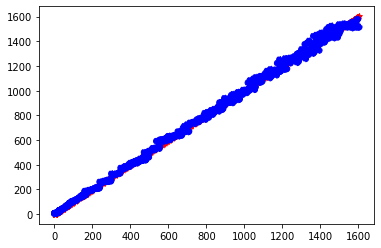

In [103]:
evaluate(model, X_train, X_test, y_train, y_test)

# DecisionTreeRegressor

In [104]:
model = dt_pipeline

In [105]:
%time model.fit(X_train,y_train)
all_models.append(model)

CPU times: total: 46.9 ms
Wall time: 29.5 ms


## Evaluate

score(X_train,y_train)0.9987599302428423
score(X_test,y_test)0.996610581205476
Train MSE: 304.0851474179639 Test MSE: 872.6157372765961
Train MAE: 12.833569280773661 Test MAE: 22.121165896673013
Train MAPE: 0.0420393722883035 Test MAPE: 0.13334148404755836
Train R2: 0.9987599302428423 Test R2: 0.996610581205476
predict X
MSE:  702.6006087303543
MAE:  19.343774564167227
R2:  0.9972318046735884
Visualization predict X


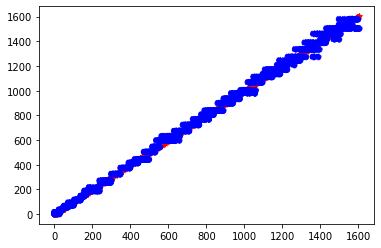

In [106]:
evaluate(model, X_train, X_test, y_train, y_test)

# GradientBoostingRegressor

In [107]:
model = gbdt_pipeline

In [108]:
%time model.fit(X_train,y_train)
all_models.append(model)

CPU times: total: 93.8 ms
Wall time: 91.2 ms


## Evaluate

score(X_train,y_train)0.999968444431703
score(X_test,y_test)0.9982368638672395
Train MSE: 7.737935371852398 Test MSE: 453.9245309235316
Train MAE: 2.1758984824957013 Test MAE: 15.310863734204908
Train MAPE: 0.018948587522203145 Test MAPE: 0.0661370963705794
Train R2: 0.999968444431703 Test R2: 0.9982368638672395
predict X
MSE:  320.49552507673764
MAE:  11.382943503430623
R2:  0.9987372709279935
Visualization predict X


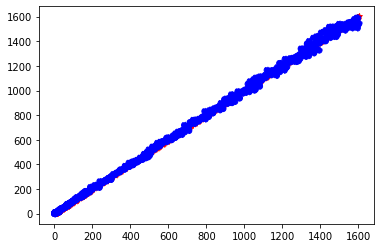

In [109]:
evaluate(model, X_train, X_test, y_train, y_test)

# XBG

In [110]:
model = xgb_pipeline

In [111]:
%time model.fit(X_train,y_train)
all_models.append(model)

CPU times: total: 1.22 s
Wall time: 126 ms


## Evaluate

score(X_train,y_train)0.9999997683897897
score(X_test,y_test)0.9980236104829093
Train MSE: 0.05679456705176286 Test MSE: 508.82723562756564
Train MAE: 0.17845686613530126 Test MAE: 15.924402052149581
Train MAPE: 0.001664002960590079 Test MAPE: 0.061913514589061754
Train R2: 0.9999997683897897 Test R2: 0.9980236104829093
predict X
MSE:  356.682964975498
MAE:  11.215686386475456
R2:  0.9985946950452547
Visualization predict X


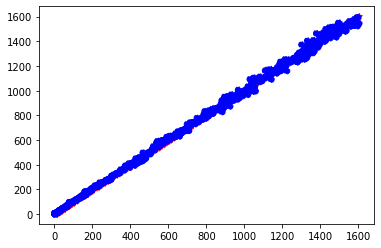

In [112]:
evaluate(model, X_train, X_test, y_train, y_test)

# 7. Ансамбль смешивания (Ensemble stacking)

In [113]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

In [114]:
xgb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('ColumnTransformer',
                 DataFrameMapper(df_out=True, drop_cols=[],
                                 features=[(['temp'], [SimpleImputer()]),
                                           (['dew'], [SimpleImputer()]),
                                           (['humidity'], [SimpleImputer()]),
                                           (['precip'], [SimpleImputer()]),
                                           (['windgust'], [SimpleImputer()]),
                                           (['windspeed'], [SimpleImputer()]),
                                           (['winddir'], [SimpleImputer()]),
                                           (['sealevelpressure'],
                                            [SimpleImputer()]),
                                           (...
                              gamma=0.5, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.2, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=150, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [115]:
import pickle

with open('xgb_pipeline.pkl', 'wb') as f:
    pickle.dump(xgb_pipeline, f,protocol=pickle.HIGHEST_PROTOCOL)

In [116]:
estimators_en = estimators

In [117]:
# delete Linreg
estimators_en.pop(0);


In [118]:
# delete elastic
estimators_en.pop(2);

## StackingRegressor

In [119]:
stack_reg = StackingRegressor(estimators=estimators_en, final_estimator=RidgeCV(),n_jobs=-1,cv=4)

In [120]:
%time stack_reg.fit(X_train, y_train)
all_models.append(model)

CPU times: total: 1.97 s
Wall time: 1.69 s


### Evaluate

score(X_train,y_train)0.9998118077498489
score(X_test,y_test)0.9982507326779505
Train MSE: 46.14778144519725 Test MSE: 450.3539652255849
Train MAE: 5.478550848927549 Test MAE: 15.949473635141757
Train MAPE: 0.20109899532698328 Test MAPE: 0.24933630295551618
Train R2: 0.9998118077498489 Test R2: 0.9982507326779505
predict X
MSE:  329.4789102673351
MAE:  12.818216821082485
R2:  0.9987018770433441
Visualization predict X


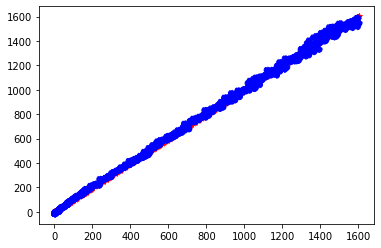

In [121]:
evaluate(stack_reg, X_train, X_test, y_train, y_test)

In [122]:
from sklearn.ensemble import VotingRegressor

## VotingRegressor

In [123]:
vot_reg = VotingRegressor(estimators=estimators_en,n_jobs=-1)

In [124]:
%time vot_reg.fit(X_train, y_train)

all_models.append(model)

CPU times: total: 15.6 ms
Wall time: 203 ms


### Evaluate

score(X_train,y_train)0.9986834396320069
score(X_test,y_test)0.9975242180281714
Train MSE: 322.8418814949878 Test MSE: 637.3972771301316
Train MAE: 14.277239070371943 Test MAE: 20.359573632943903
Train MAPE: 0.6192961836919967 Test MAPE: 0.7249951937870838
Train R2: 0.9986834396320069 Test R2: 0.9975242180281714
predict X
MSE:  543.3316683875646
MAE:  18.540693680021665
R2:  0.9978593127212916
Visualization predict X


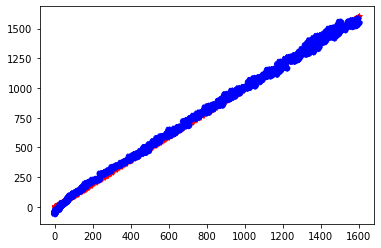

In [125]:
evaluate(vot_reg, X_train, X_test, y_train, y_test)

In [126]:
models_name = ["Lasso", "LinearRegression","Ridge","ElasticNet", "SGDregressor","RandomForrestRegressor","DecisionTreeregressor", "GradientBoostingRegressor", "XGB","StackingRegressor", "VotingRegressor"]
all_models

[Pipeline(steps=[('ColumnTransformer',
                  DataFrameMapper(df_out=True, drop_cols=[],
                                  features=[(['temp'], [SimpleImputer()]),
                                            (['dew'], [SimpleImputer()]),
                                            (['humidity'], [SimpleImputer()]),
                                            (['precip'], [SimpleImputer()]),
                                            (['windgust'], [SimpleImputer()]),
                                            (['windspeed'], [SimpleImputer()]),
                                            (['winddir'], [SimpleImputer()]),
                                            (['sealevelpressure'],
                                             [SimpleImputer()]),
                                            (['cloudcover'], [SimpleImputer()]),
                                            (['visibility'], [SimpleImputer()]),
                                            (['moonphase'], [Sim

In [127]:
len(all_models)

11

In [128]:
len(models_name)

11

In [129]:
models_name

['Lasso',
 'LinearRegression',
 'Ridge',
 'ElasticNet',
 'SGDregressor',
 'RandomForrestRegressor',
 'DecisionTreeregressor',
 'GradientBoostingRegressor',
 'XGB',
 'StackingRegressor',
 'VotingRegressor']

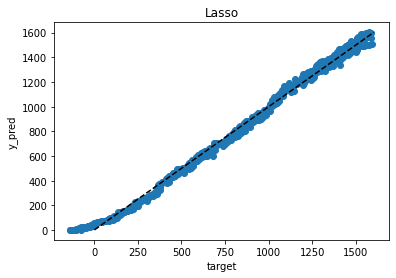

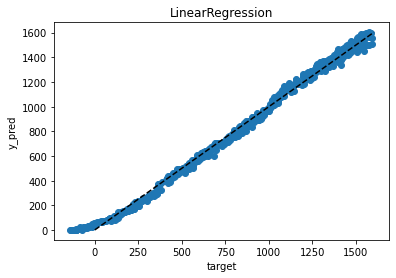

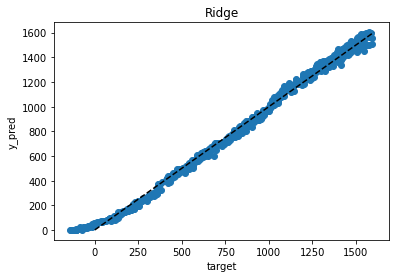

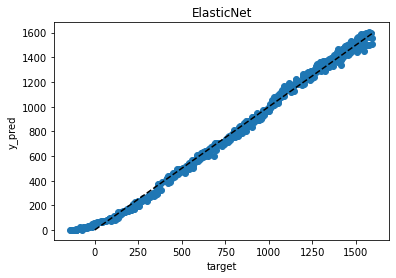

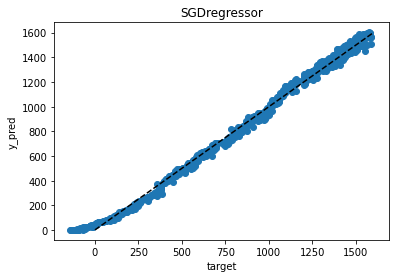

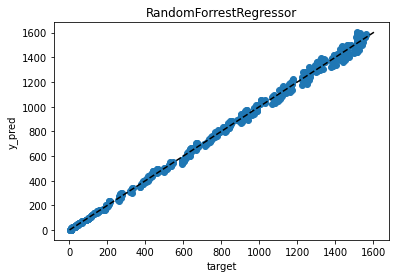

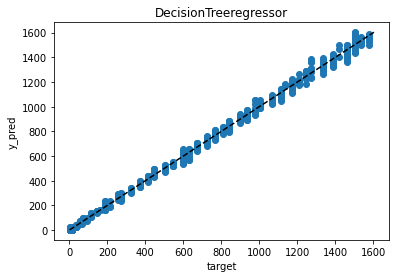

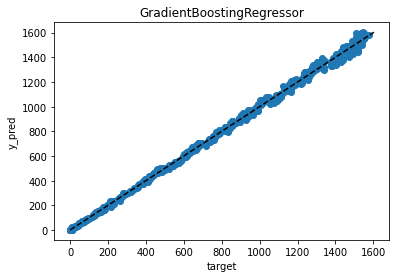

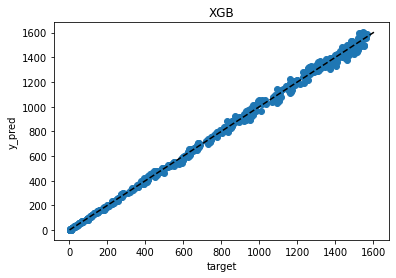

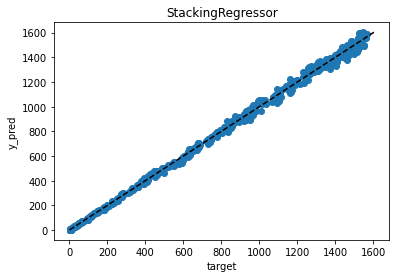

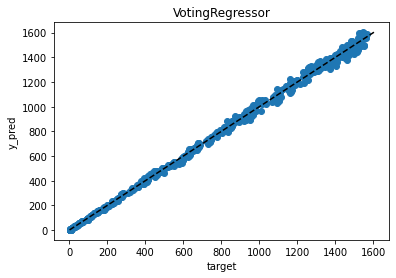

In [130]:
import matplotlib.pyplot as plt
import pandas as pd



# Loop over all file names
for n, models_name in enumerate(models_name):
    # Load dataframe and convert to float64
    
    y_test_predicted_pruned_trees = all_models[n].predict(X_test)
    # Create a scatter plot of the two columns
    plt.scatter(y_test_predicted_pruned_trees, y_test)
    plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'k--')
#     plt.scatter(df.iloc[:, 0], df.iloc[:, 1])

    # Set axis labels
    plt.title(models_name)
    plt.xlabel("target")
    plt.ylabel("y_pred")

    # Show the plot
    plt.show()

# Feature importances

In [131]:
model = gbdt_pipeline

In [132]:
raise()

TypeError: exceptions must derive from BaseException

In [133]:
%time model.fit(X_train,y_train)

CPU times: total: 93.8 ms
Wall time: 93.2 ms


Pipeline(steps=[('ColumnTransformer',
                 DataFrameMapper(df_out=True, drop_cols=[],
                                 features=[(['temp'], [SimpleImputer()]),
                                           (['dew'], [SimpleImputer()]),
                                           (['humidity'], [SimpleImputer()]),
                                           (['precip'], [SimpleImputer()]),
                                           (['windgust'], [SimpleImputer()]),
                                           (['windspeed'], [SimpleImputer()]),
                                           (['winddir'], [SimpleImputer()]),
                                           (['sealevelpressure'],
                                            [SimpleImputer()]),
                                           (['cloudcover'], [SimpleImputer()]),
                                           (['visibility'], [SimpleImputer()]),
                                           (['moonphase'], [SimpleImputer()]),
                                           (['datetime_1'], [SimpleImputer()]),
                                           (['datetime_2'], [SimpleImputer()])],
                                 input_df=True)),
                ('model',
                 GradientBoostingRegressor(max_depth=4, min_samples_leaf=2,
                                           n_estimators=150, random_state=0,
                                           subsample=0.5))])

In [134]:
X_train_scaled = model.named_steps.ColumnTransformer.transform(X_train)
X_test_scaled = model.named_steps.ColumnTransformer.transform(X_test)
#if you want work with X
X_scaled = model.named_steps.ColumnTransformer.transform(X)

score(X_train,y_train)0.999968444431703
score(X_test,y_test)0.9982368638672395
Train MSE: 7.737935371852398 Test MSE: 453.9245309235316
Train MAE: 2.1758984824957013 Test MAE: 15.310863734204908
Train MAPE: 0.018948587522203145 Test MAPE: 0.0661370963705794
Train R2: 0.999968444431703 Test R2: 0.9982368638672395
predict X
MSE:  320.49552507673764
MAE:  11.382943503430623
R2:  0.9987372709279935
Visualization predict X


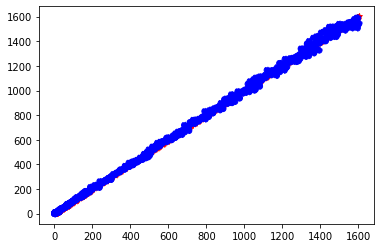

In [135]:
evaluate(model, X_train, X_test, y_train, y_test)

# GradientBoostingRegressor importances

<AxesSubplot:>

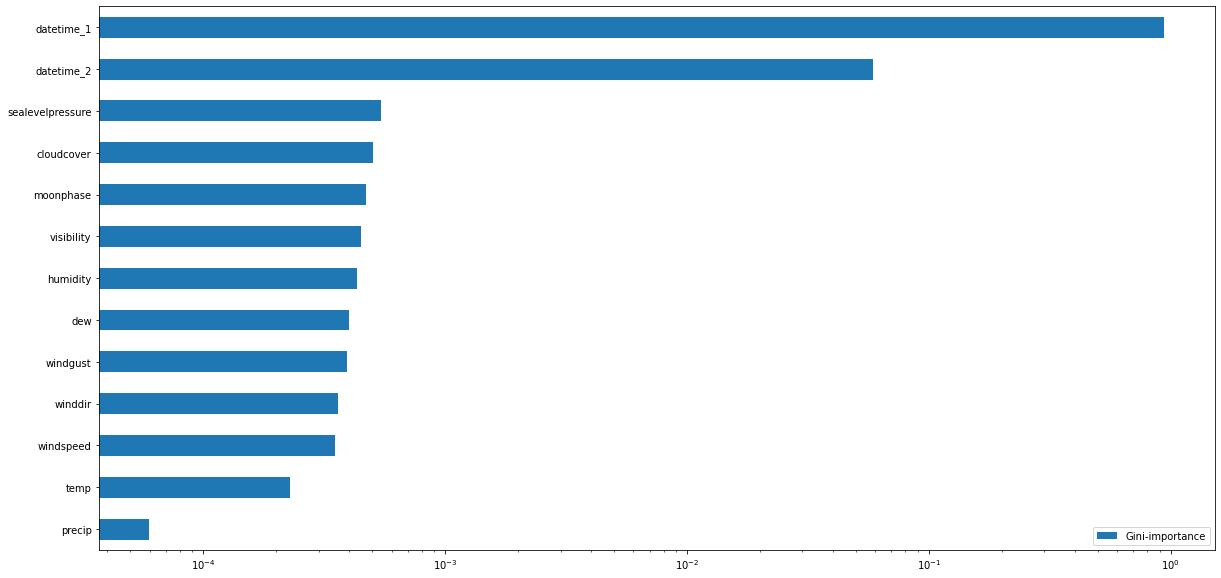

In [136]:
plt.rcParams['figure.figsize'] = (20,10)

# do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train_scaled.columns, model.named_steps.model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='barh', logx=True)

In [137]:
importances.sort_values(by='Gini-importance').index

Index(['precip', 'temp', 'windspeed', 'winddir', 'windgust', 'dew', 'humidity',
       'visibility', 'moonphase', 'cloudcover', 'sealevelpressure',
       'datetime_2', 'datetime_1'],
      dtype='object')

In [138]:
raise()

TypeError: exceptions must derive from BaseException

In [139]:
importance_score = importances.sort_values(by='Gini-importance')

# I want to see >= 0.035
feature_importance_score_rf = importance_score

feature_importance_score_rf.sort_values(by=['Gini-importance'], ascending=False, inplace=True)

feature_importance_score_rf.reset_index(inplace=True)

feature_importance_score_rf

,index,Gini-importance
0,datetime_1,0.937037
1,datetime_2,0.058768
2,sealevelpressure,0.000544
3,cloudcover,0.000504
4,moonphase,0.000470
5,visibility,0.000449
6,humidity,0.000431
7,dew,0.000401
8,windgust,0.000394
9,winddir,0.000361


# Permutation importance

In [140]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_train, y_train, n_repeats=30,random_state=0,n_jobs=-1)

In [141]:
permutation_importance_score_columns = []
permutation_importance_score = []
for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i]:
        print(f"{X_train_scaled.columns[i]}"
            f"{result.importances_mean[i]:.3f}"
            f" +/- {result.importances_std[i]:.3f}")
        permutation_importance_score_columns.append(X_train_scaled.columns[i])
        permutation_importance_score.append(result.importances_mean[i])

datetime_11.893 +/- 0.120
datetime_20.112 +/- 0.010
humidity0.000 +/- 0.000
sealevelpressure0.000 +/- 0.000
cloudcover0.000 +/- 0.000
dew0.000 +/- 0.000
visibility0.000 +/- 0.000
moonphase0.000 +/- 0.000
windgust0.000 +/- 0.000
winddir0.000 +/- 0.000
windspeed0.000 +/- 0.000
temp0.000 +/- 0.000
precip0.000 +/- 0.000


In [145]:
permutation_importance_score_columns

['datetime_1',
 'datetime_2',
 'humidity',
 'sealevelpressure',
 'cloudcover',
 'dew',
 'visibility',
 'moonphase',
 'windgust',
 'winddir',
 'windspeed',
 'temp',
 'stations_x0_36883099999']

In [146]:
permutation_importance_score = pd.DataFrame(permutation_importance_score, index=permutation_importance_score_columns,columns=['permutation_importance_score'])

feature_permutation_importance_score = permutation_importance_score

feature_permutation_importance_score.reset_index(inplace=True)

feature_permutation_importance_score

,index,permutation_importance_score
0,datetime_1,1.893209
1,datetime_2,0.112258
2,humidity,0.000256
3,sealevelpressure,0.000238
4,cloudcover,0.000235
5,dew,0.000224
6,visibility,0.000209
7,moonphase,0.000144
8,windgust,0.000109
9,winddir,0.000106


In [147]:
feature_permutation_importance_score.columns

Index(['index', 'permutation_importance_score'], dtype='object')

<AxesSubplot:xlabel='index'>

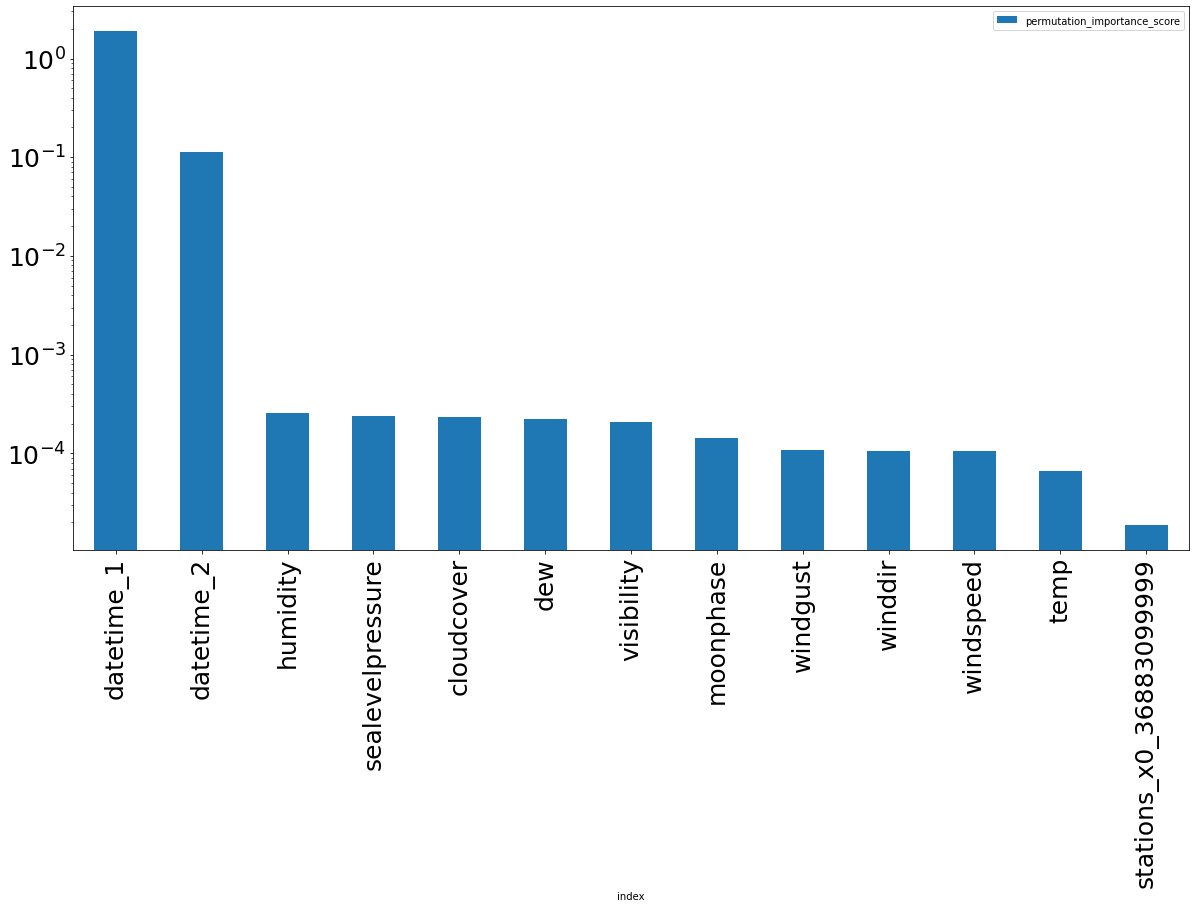

In [148]:
feature_permutation_importance_score.plot(x='index',kind='bar',logy =True, fontsize = 25)

In [149]:
X_test_scaled.iloc[0,:]

temp                0.569378
dew                 0.539007
humidity            0.391338
precip              0.027201
windgust            0.285714
windspeed           0.475219
winddir             0.814963
sealevelpressure    0.301695
cloudcover          0.831694
visibility          0.734694
moonphase           0.470000
datetime_1          0.333333
datetime_2          0.800000
Name: 413, dtype: float64

In [150]:
model.named_steps.model.predict(X_test_scaled.iloc[0:])[0]

620.0105372115104

# Shap feature importance

In [151]:
import shap

In [152]:
# Create object that can calculate shap values
model.named_steps.model.predict(X_test_scaled)
explainer = shap.TreeExplainer(model.named_steps.model)

shap_values = explainer.shap_values(X_test_scaled)
feature_names = list(X_test_scaled.columns.values)

In [153]:
explainer.expected_value

array([734.24115959])

In [154]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0],X_test_scaled.iloc[0])

In [155]:
shap_values[:,:]

array([[-1.60787940e-02,  4.80564415e-01,  1.33528482e+00, ...,
        -1.72898152e+00, -2.65783111e+02,  1.47139603e+02],
       [-1.64084496e+00,  5.13186536e-01,  3.46633559e-01, ...,
        -1.21131601e+00,  2.09237713e+02, -1.33338548e+02],
       [-7.27788026e-01, -1.09390110e+00, -3.24679472e-01, ...,
         2.58228188e-01, -2.73009883e+02, -1.00750846e+02],
       ...,
       [-2.93175708e+00,  4.58071423e+00,  1.65047285e+00, ...,
         1.30805719e+00, -2.60611375e+02,  9.85007222e+01],
       [-4.08233947e-01, -4.17135823e+00,  9.52095258e-01, ...,
        -1.26556821e+00, -6.65069053e+02,  1.54718372e+02],
       [-1.05989388e+00, -3.28958619e-01,  4.93196096e+00, ...,
        -7.97520160e+00,  6.68827166e+02,  1.02305148e+02]])

In [156]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1],X_test_scaled.iloc[1])

In [157]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[2],X_test_scaled.iloc[2])

In [158]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[3],X_test_scaled.iloc[3])

In [159]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[4],X_test_scaled.iloc[4])

In [160]:
for i in range(0,10):
    shap.force_plot(explainer.expected_value, shap_values[i],X_test_scaled.iloc[i])
    

In [161]:
#shap.dependence_plot(1,shap_values,X_test_scaled)

In [162]:
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

Explainer expected value: [734.24115959]


In [163]:
# Our naive cutoff point is zero log odds (probability 0.5).
y_pred = (shap_values[0].sum() + expected_value) > 0
select = range(20)
misclassified = y_pred != y_test[0]

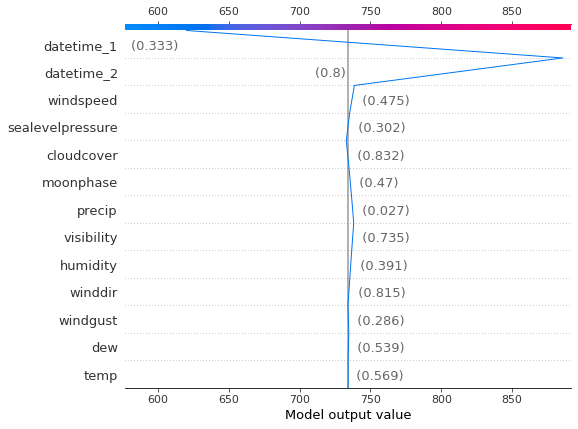

In [164]:
shap.decision_plot(explainer.expected_value, shap_values[0], X_test_scaled.iloc[0])

explainer = shap.KernelExplainer(model.named_steps.model.predict, X_train_scaled)
row = X_test_scaled.sample(30)
#row = X_test_scaled
shap_values = explainer.shap_values(row);

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1],feature_names)

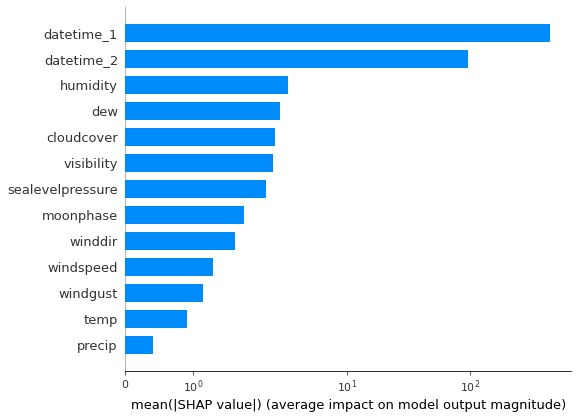

In [165]:
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X_test_scaled,plot_type='bar',use_log_scale=True)

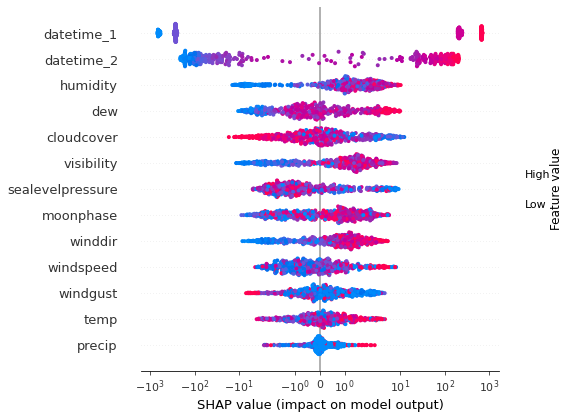

In [166]:
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X_test_scaled,use_log_scale=True)

<AxesSubplot:xlabel='index'>

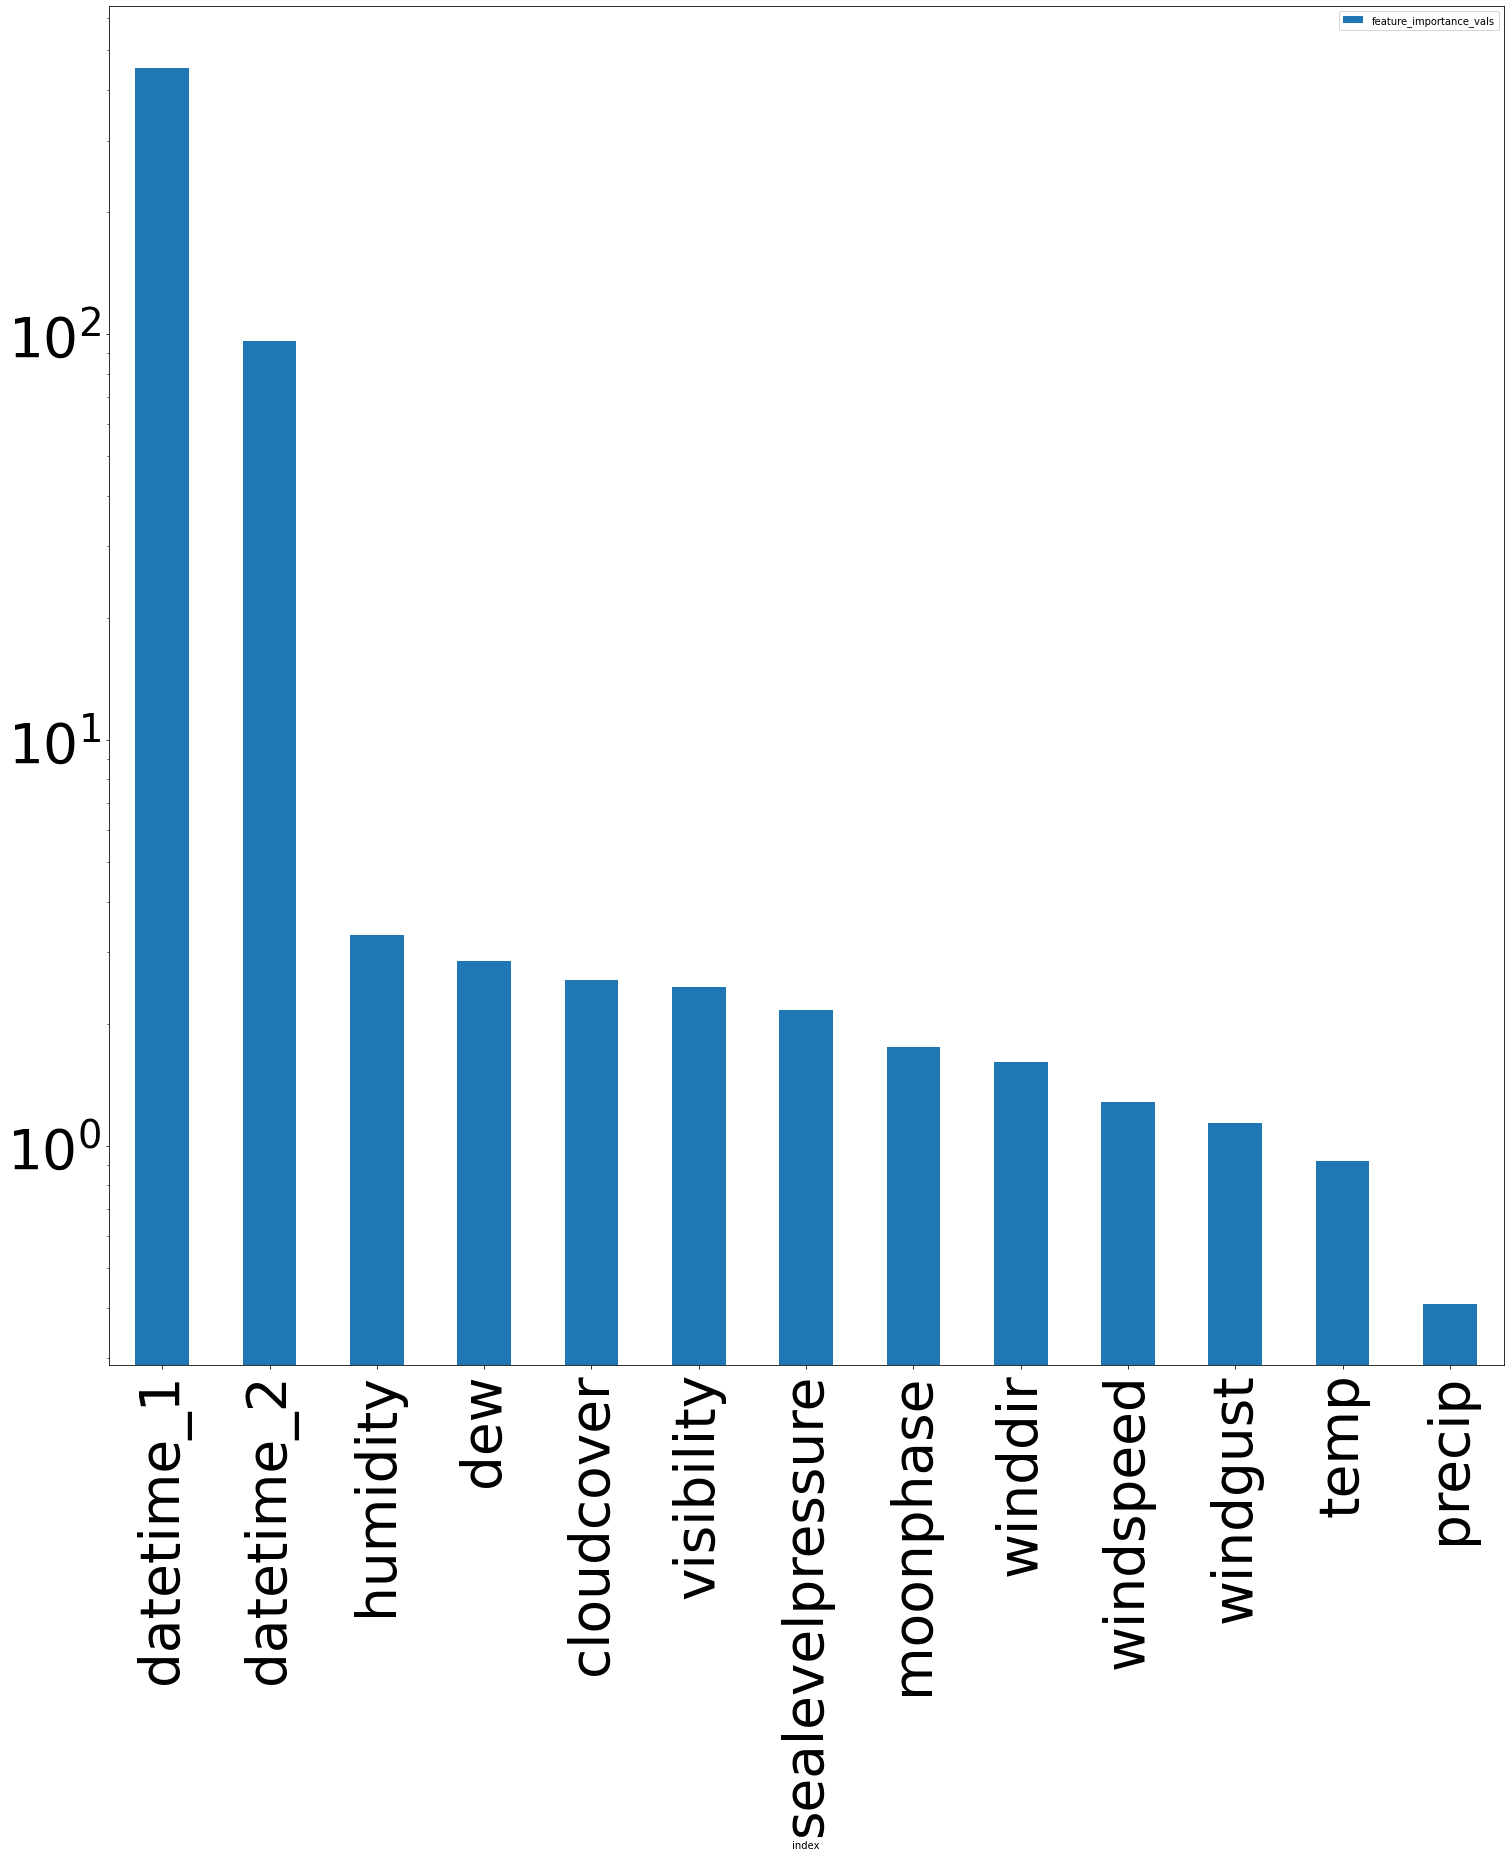

In [168]:
feature_names = list(X_test_scaled.columns.values)

vals = np.abs(shap_values).mean(0)
feature_importance_shap = pd.DataFrame(list(zip(feature_names, vals)), columns=['index','feature_importance_vals'])
feature_importance_shap.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
feature_importance_shap.reset_index(drop=True,inplace=True)
feature_importance_shap[feature_importance_shap.feature_importance_vals>0].plot(x='index',kind='bar', figsize =(25,25),logy =True,fontsize=55)

# mi_score

Text(0.5, 0, 'Mutual information')

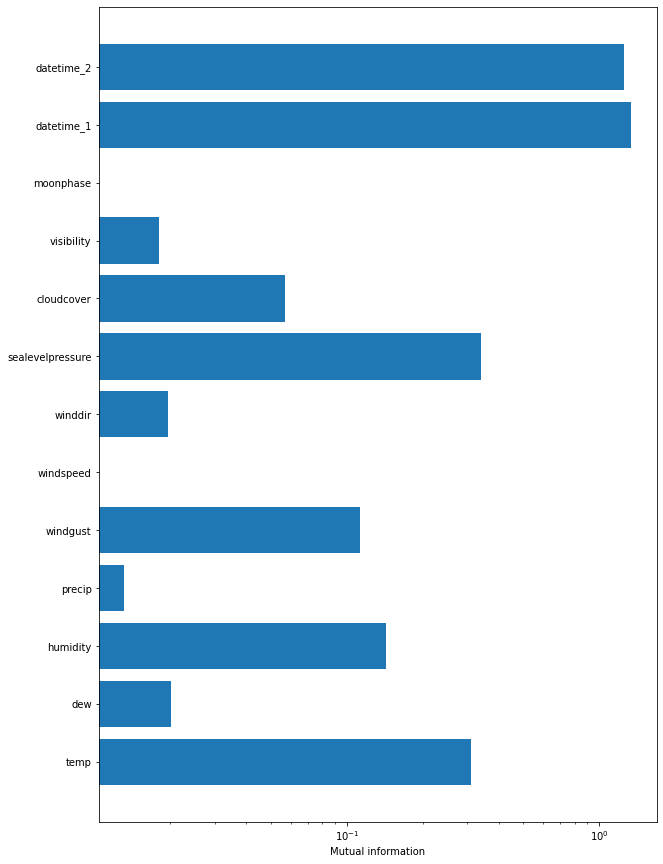

In [169]:
# mutual information
from sklearn.feature_selection import mutual_info_regression

discrete = []
for col in X_train_scaled.columns:
    discrete.append(X_train_scaled[col].dtype == int)

mi_score = pd.DataFrame(mutual_info_regression(X_train_scaled,y_train,discrete_features=discrete), index=X_train_scaled.columns, columns=['Mutual information'])
plt.rcParams["figure.figsize"] = (10,15)
plt.barh(np.arange(len(discrete)), mi_score['Mutual information'],log =True)
plt.yticks(ticks=np.arange(len(discrete)),labels=mi_score.index)
plt.xlabel('Mutual information')

In [170]:
# I want to see >= 0.019
feature = mi_score
feature_importance_mi_score = feature.reset_index()

feature_importance_mi_score.sort_values(by=['Mutual information'], ascending=False, inplace=True)

feature_importance_mi_score.reset_index()

,level_0,index,Mutual information
0,11,datetime_1,1.343059
1,12,datetime_2,1.256490
2,7,sealevelpressure,0.339145
3,0,temp,0.311653
4,2,humidity,0.143378
5,4,windgust,0.112751
6,8,cloudcover,0.056632
7,1,dew,0.020018
8,6,winddir,0.019533
9,9,visibility,0.018016


<AxesSubplot:xlabel='index'>

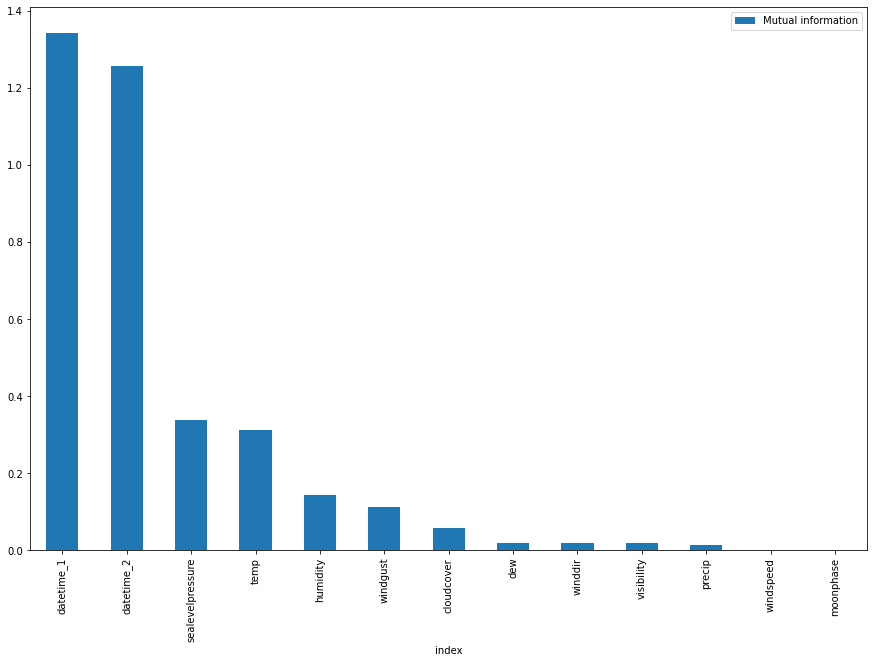

In [171]:

feature_importance_mi_score.plot(x = 'index',y = 'Mutual information', kind = 'bar',figsize=[15,10])

# Feature importances conclusion

In [172]:
dfs = [feature_importance_score_rf,feature_permutation_importance_score,feature_importance_shap,feature_importance_mi_score]
feature_importance_conclusion = pd.concat(dfs, join='outer',axis=1)

In [173]:
# DataFrame with feature importance
feature_importance_conclusion

,index,Gini-importance,index,permutation_importance_score,index,feature_importance_vals,index,Mutual information
0,datetime_1,0.937037,datetime_1,1.893209,datetime_1,452.166694,temp,0.311653
1,datetime_2,0.058768,datetime_2,0.112258,datetime_2,96.215358,dew,0.020018
2,sealevelpressure,0.000544,humidity,0.000256,humidity,3.312358,humidity,0.143378
3,cloudcover,0.000504,sealevelpressure,0.000238,dew,2.851230,precip,0.013091
4,moonphase,0.000470,cloudcover,0.000235,cloudcover,2.564522,windgust,0.112751
5,visibility,0.000449,dew,0.000224,visibility,2.469711,windspeed,0.000000
6,humidity,0.000431,visibility,0.000209,sealevelpressure,2.167916,winddir,0.019533
7,dew,0.000401,moonphase,0.000144,moonphase,1.752039,sealevelpressure,0.339145
8,windgust,0.000394,windgust,0.000109,winddir,1.612658,cloudcover,0.056632
9,winddir,0.000361,winddir,0.000106,windspeed,1.286110,visibility,0.018016


In [174]:
numerical_features

Index(['temp', 'dew', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'moonphase',
       'datetime_1', 'datetime_2'],
      dtype='object')

In [175]:
# Also we can look relationship between more than 2 distribution
#sns.set(style = "white")
#df = df[numerical_features]
#g = sns.PairGrid(df,diag_sharey = False,corner=False)
#g.map_lower(sns.kdeplot,cmap="Blues_d")
#g.map_upper(plt.scatter)
#g.map_diag(sns.kdeplot,fill=True,lw =3)
#g.map_offdiag(sns.scatter ,s=80)
#plt.show()

# GridSearch

In [176]:
## Perform RandomizedSearchCV
#from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#gridsearch_roc_auc_pipe = GridSearchCV(estimator=xgb_pipeline
#                                       , param_grid=xgb_param_grid_pipe,
#                                        scoring='neg_mean_squared_error', cv=sss, verbose=1,n_jobs=-1)
## Fit the estimator
#gridsearch_roc_auc_pipe.fit(X, y)
#
## Compute metrics
#print('Score: ', gridsearch_roc_auc_pipe.best_score_)
#print('Estimator: ', gridsearch_roc_auc_pipe.best_estimator_)
#grid_best = gridsearch_roc_auc_pipe.best_params_
#grid_best

# Keras

In [177]:
ct.fit(X_train)

DataFrameMapper(df_out=True, drop_cols=[],
                features=[(['temp'], [SimpleImputer()]),
                          (['dew'], [SimpleImputer()]),
                          (['humidity'], [SimpleImputer()]),
                          (['precip'], [SimpleImputer()]),
                          (['windgust'], [SimpleImputer()]),
                          (['windspeed'], [SimpleImputer()]),
                          (['winddir'], [SimpleImputer()]),
                          (['sealevelpressure'], [SimpleImputer()]),
                          (['cloudcover'], [SimpleImputer()]),
                          (['visibility'], [SimpleImputer()]),
                          (['moonphase'], [SimpleImputer()]),
                          (['datetime_1'], [SimpleImputer()]),
                          (['datetime_2'], [SimpleImputer()])],
                input_df=True)

In [178]:
X.shape

(836, 13)

In [179]:

X_train_keras = ct.transform(X_train)
X_test_keras = ct.transform(X_test)
X_keras = ct.transform(X)

In [180]:
X_train_keras

,temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,datetime_1,datetime_2
508,0.492823,0.815603,0.648010,0.064276,0.285714,0.481050,0.652199,0.474576,0.688525,0.530612,0.00,0.333333,0.066667
740,0.708134,0.524823,0.250572,0.000000,0.177579,0.110787,0.430611,0.342373,0.712568,0.816327,0.50,0.000000,0.833333
810,0.880383,0.312057,0.064206,0.000000,0.037698,0.265306,0.428898,0.311864,0.746448,0.632653,0.93,1.000000,0.100000
176,0.645933,0.709220,0.440903,0.000000,0.035714,0.055394,0.250143,0.274576,0.287432,0.693878,0.68,0.333333,0.833333
168,0.497608,0.822695,0.659143,0.807173,0.071429,0.320700,0.841234,0.545763,0.901639,0.551020,0.48,0.333333,0.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.717703,0.361702,0.156016,0.000000,0.251984,0.215743,0.619646,0.352542,0.871038,0.591837,0.27,0.333333,0.566667
192,0.736842,0.822695,0.423364,0.000000,0.107143,0.160350,0.310109,0.233898,0.307104,0.469388,0.27,0.666667,0.366667
629,0.779904,0.390071,0.141833,0.000000,0.003968,0.160350,0.654483,0.294915,0.617486,0.816327,0.46,0.333333,0.066667
559,0.813397,0.517730,0.191246,0.000000,0.464286,0.265306,0.649914,0.193220,0.361749,0.918367,0.73,0.666667,0.766667


In [181]:
import tensorflow as tf
from tensorflow import keras 

In [182]:
input = X_train_keras.shape[1]

In [183]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(835, input_dim=input, kernel_initializer='normal', activation='relu'))

model.add(keras.layers.Dense(417, kernel_initializer='normal', activation='relu'))

model.add(keras.layers.Dense(213, kernel_initializer='normal', activation='relu'))

model.add(keras.layers.Dense(1, kernel_initializer='normal'))

In [184]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


In [185]:
model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mae','mse'])

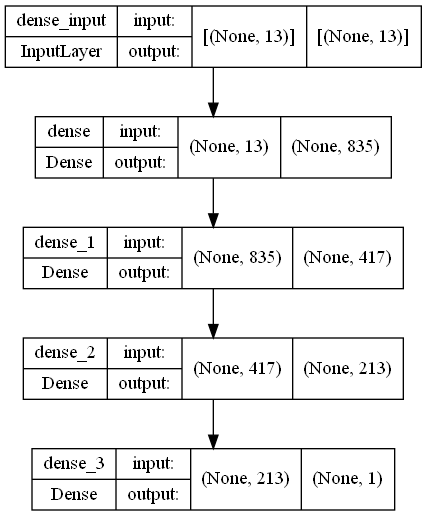

In [186]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True) 
from IPython.display import Image
Image("model.png")

In [187]:
batch_size = 128
epochs = 300

In [188]:
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='mse', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.9, 
                                            min_lr=0.0000000001)

In [189]:
%time history = model.fit(X_train_keras,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_test_keras,y_test),verbose=0,callbacks=[learning_rate_reduction])


Epoch 82: ReduceLROnPlateau reducing learning rate to 0.0009000000427477062.

Epoch 90: ReduceLROnPlateau reducing learning rate to 0.0008100000384729356.

Epoch 98: ReduceLROnPlateau reducing learning rate to 0.0007290000503417104.

Epoch 105: ReduceLROnPlateau reducing learning rate to 0.0006561000715009868.

Epoch 113: ReduceLROnPlateau reducing learning rate to 0.0005904900433961303.

Epoch 121: ReduceLROnPlateau reducing learning rate to 0.0005314410547725857.

Epoch 128: ReduceLROnPlateau reducing learning rate to 0.00047829695977270604.

Epoch 132: ReduceLROnPlateau reducing learning rate to 0.0004304672533180565.

Epoch 139: ReduceLROnPlateau reducing learning rate to 0.00038742052274756136.

Epoch 148: ReduceLROnPlateau reducing learning rate to 0.0003486784757114947.

Epoch 154: ReduceLROnPlateau reducing learning rate to 0.00031381062290165574.

Epoch 160: ReduceLROnPlateau reducing learning rate to 0.0002824295632308349.

Epoch 166: ReduceLROnPlateau reducing learning rate

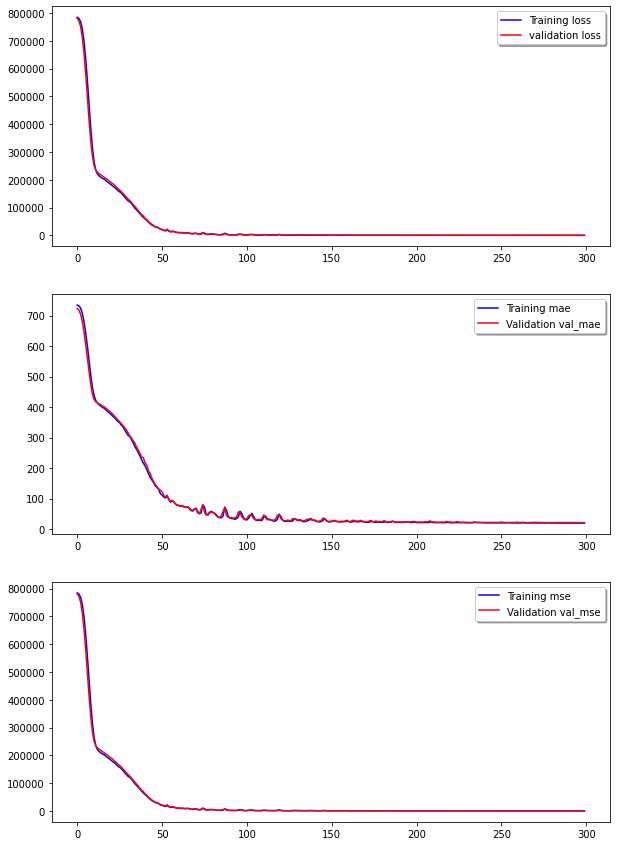

In [190]:
fig, ax = plt.subplots(3,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['mae'], color='b', label="Training mae")
ax[1].plot(history.history['val_mae'], color='r',label="Validation val_mae")
legend = ax[1].legend(loc='best', shadow=True)

ax[2].plot(history.history['mse'], color='b', label="Training mse")
ax[2].plot(history.history['val_mse'], color='r',label="Validation val_mse")
legend = ax[2].legend(loc='best', shadow=True)

# Evaluate

Train MSE: 614.3484824019508 Test MSE: 751.4325255714604
Train MAE: 19.83221132797032 Test MAE: 21.20668964245515
Train MAPE: 0.10236979732510902 Test MAPE: 0.13828204104552186
Train R2: 0.9974946656229308 Test R2: 0.9970812816957239
predict X
MSE:  710.4384896705568
MAE:  20.795661140339572
R2:  0.997200923992419
Visualization predict X


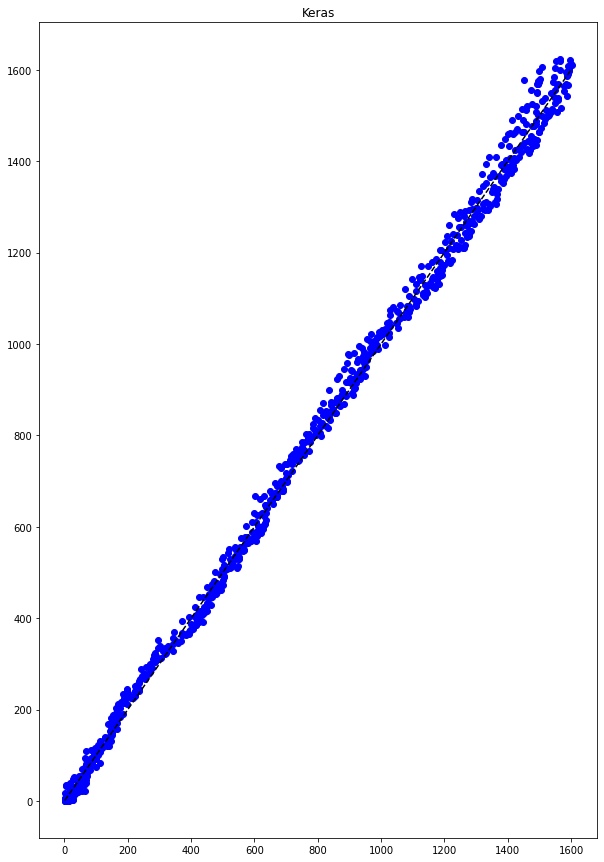

In [191]:
y_train_predicted = history.model.predict(X_train_keras)
y_test_predicted_pruned_trees = history.model.predict(X_test_keras)
mse_train = mean_squared_error(y_train, y_train_predicted)
mse_test = mean_squared_error(y_test, y_test_predicted_pruned_trees)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted_pruned_trees)
mape_train = mean_absolute_percentage_error(y_train, y_train_predicted)
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted_pruned_trees)    
print("Train MSE: {} Test MSE: {}".format(mse_train, mse_test))
print("Train MAE: {} Test MAE: {}".format(mae_train, mae_test))
print("Train MAPE: {} Test MAPE: {}".format(mape_train, mape_test))
r2_train = r2_score(y_train, y_train_predicted)
r2_test = r2_score(y_test, y_test_predicted_pruned_trees)
print("Train R2: {} Test R2: {}".format(r2_train, r2_test))
predicts = history.model.predict(X_keras)
print('predict X')
print('MSE: ', mean_squared_error(y,predicts))
print('MAE: ', mean_absolute_error(y,predicts))
print('R2: ', r2_score(y,predicts))

print('Visualization predict X')
plt.xlabel('', fontsize=60)
plt.ylabel('', fontsize=60)
plt.title("Keras")
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'k--')
# plt.scatter(df['yield'],df['yield'], color ='red', marker='*')
plt.scatter(df['yield'], history.model.predict(X_keras),color='blue')

In [192]:
history.model.evaluate(X_test_keras,y_test)


19/19 [==============================] - 0s 903us/step - loss: 751.4326 - mae: 21.2067 - mse: 751.4326


[751.4326171875, 21.206689834594727, 751.4326171875]

In [193]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

To exit: use 'exit', 'quit', or Ctrl-D.


# h2o0

In [194]:
X_train_keras = X_train_keras.merge(y_train.to_frame(), left_index=True, right_index=True)
X_test_keras = X_test_keras.merge(y_test.to_frame(), left_index=True, right_index=True)

In [195]:
X_train = h2o.H2OFrame(X_train_keras)
X_test = h2o.H2OFrame(X_test_keras)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [196]:
X_scaled = ct.transform(X)

In [197]:
X_scaled = X_scaled.merge(y.to_frame(), left_index=True, right_index=True)

In [198]:
y = pd.DataFrame(y)
y = h2o.H2OFrame(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [199]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [200]:
y_train = h2o.H2OFrame(y_train)
y_test = h2o.H2OFrame(y_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [201]:
X = X.copy(deep = True)
X = h2o.H2OFrame(X_scaled)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [202]:
x = X.columns
#y = 'yield'
x.remove(y)

In [203]:
# raise()

## Modeling automl

In [204]:
from h2o.automl import H2OAutoML


In [205]:
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y='yield', training_frame = X)

AutoML progress: |
12:40:22.707: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_1_20230629_124022

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 48.74689013191377
RMSE: 6.9818973160534075
MAE: 5.010514366400676
RMSLE: NaN
R^2: 0.999807940796072
Mean Residual Deviance: 48.74689013191377
Null degrees of freedom: 835
Residual degrees of freedom: 831
Null deviance: 212186655.55627948
Residual deviance: 40752.400150279915
AIC: 5633.69744062951

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 305.91344287157244
RMSE: 17.490381438710035
MAE: 12.069469040840744
RMSLE: NaN
R^2: 0.9987947232705555
Mean Residual Deviance: 305.91344287157244
Null degrees of freedom: 835
Residual degrees of freedom: 831
Nu

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.212048e+01,8.713433e-01,1.306058e+01,1.279364e+01,1.106906e+01,1.137228e+01,1.230682e+01
1,mean_residual_deviance,3.044276e+02,3.097069e+01,3.435399e+02,3.315760e+02,2.742729e+02,2.884724e+02,2.842768e+02
2,mse,3.044276e+02,3.097069e+01,3.435399e+02,3.315760e+02,2.742729e+02,2.884724e+02,2.842768e+02
3,null_deviance,4.246768e+07,2.592078e+06,4.292871e+07,4.475624e+07,4.192807e+07,4.441985e+07,3.830556e+07
4,r2,9.987964e-01,1.376050e-04,9.985898e-01,9.987701e-01,9.989411e-01,9.989019e-01,9.987790e-01
5,residual_deviance,5.100716e+04,6.650628e+03,6.046303e+04,5.504161e+04,4.415794e+04,4.875184e+04,4.662139e+04
6,rmse,1.743005e+01,8.811201e-01,1.853483e+01,1.820923e+01,1.656119e+01,1.698448e+01,1.686051e+01
7,rmsle,1.198763e-01,1.641200e-02,NaN,NaN,NaN,1.082713e-01,1.314813e-01


In [206]:
aml.get_best_model()

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_1_20230629_124022

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 48.74689013191377
RMSE: 6.9818973160534075
MAE: 5.010514366400676
RMSLE: NaN
R^2: 0.999807940796072
Mean Residual Deviance: 48.74689013191377
Null degrees of freedom: 835
Residual degrees of freedom: 831
Null deviance: 212186655.55627948
Residual deviance: 40752.400150279915
AIC: 5633.69744062951

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 305.91344287157244
RMSE: 17.490381438710035
MAE: 12.069469040840744
RMSLE: NaN
R^2: 0.9987947232705555
Mean Residual Deviance: 305.91344287157244
Null degrees of freedom: 835
Residual degrees of freedom: 831
Null deviance: 212338424.90343285
Residual deviance: 255743.63824063458
AIC: 7169.14586296069

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.212048e+01,8.713433e-01,1.306058e+01,1.279364e+01,1.106906e+01,1.137228e+01,1.230682e+01
1,mean_residual_deviance,3.044276e+02,3.097069e+01,3.435399e+02,3.315760e+02,2.742729e+02,2.884724e+02,2.842768e+02
2,mse,3.044276e+02,3.097069e+01,3.435399e+02,3.315760e+02,2.742729e+02,2.884724e+02,2.842768e+02
3,null_deviance,4.246768e+07,2.592078e+06,4.292871e+07,4.475624e+07,4.192807e+07,4.441985e+07,3.830556e+07
4,r2,9.987964e-01,1.376050e-04,9.985898e-01,9.987701e-01,9.989411e-01,9.989019e-01,9.987790e-01
5,residual_deviance,5.100716e+04,6.650628e+03,6.046303e+04,5.504161e+04,4.415794e+04,4.875184e+04,4.662139e+04
6,rmse,1.743005e+01,8.811201e-01,1.853483e+01,1.820923e+01,1.656119e+01,1.698448e+01,1.686051e+01
7,rmsle,1.198763e-01,1.641200e-02,NaN,NaN,NaN,1.082713e-01,1.314813e-01


## Information avout automl

In [207]:
# Get leaderboard with all possible columns
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_1_20230629_124022,17.4904,305.913,12.0695,nan,305.913,333,0.014616,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230629_124022,17.5872,309.31,12.3122,nan,309.31,337,0.027797,StackedEnsemble
GBM_grid_1_AutoML_1_20230629_124022_model_5,17.6971,313.187,11.9924,nan,313.187,230,0.010436,GBM
GBM_grid_1_AutoML_1_20230629_124022_model_2,21.6674,469.478,15.7169,nan,469.478,113,0.0081,GBM
GBM_3_AutoML_1_20230629_124022,34.5018,1190.37,26.4655,nan,1190.37,172,0.011553,GBM
GBM_1_AutoML_1_20230629_124022,35.3496,1249.6,28.263,nan,1249.6,299,0.011179,GBM
GBM_5_AutoML_1_20230629_124022,49.4359,2443.91,37.0569,nan,2443.91,152,0.0098,GBM
GLM_1_AutoML_1_20230629_124022,52.3145,2736.81,43.0086,nan,2736.81,23,0.000597,GLM
GBM_2_AutoML_1_20230629_124022,54.954,3019.94,41.944,nan,3019.94,181,0.012546,GBM
DeepLearning_grid_1_AutoML_1_20230629_124022_model_1,63.9052,4083.88,47.7231,nan,4083.88,9603,0.003225,DeepLearning


In [208]:
type(lb)

h2o.frame.H2OFrame

In [209]:
nb = lb.as_data_frame()

In [210]:
nb.to_excel('nb.xlsx')

#### Best model

In [211]:
m = aml.get_best_model()

In [212]:
m.download_model()

'C:\\Users\\Chingiz\\Jupyter root\\dissertation\\StackedEnsemble_BestOfFamily_1_AutoML_1_20230629_124022'

In [213]:
m.training_model_metrics

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_1_20230629_124022

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 48.74689013191377
RMSE: 6.9818973160534075
MAE: 5.010514366400676
RMSLE: NaN
R^2: 0.999807940796072
Mean Residual Deviance: 48.74689013191377
Null degrees of freedom: 835
Residual degrees of freedom: 831
Null deviance: 212186655.55627948
Residual deviance: 40752.400150279915
AIC: 5633.69744062951

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 305.91344287157244
RMSE: 17.490381438710035
MAE: 12.069469040840744
RMSLE: NaN
R^2: 0.9987947232705555
Mean Residual Deviance: 305.91344287157244
Null degrees of freedom: 835
Residual degrees of freedom: 831
Null deviance: 212338424.90343285
Residual deviance: 255743.63824063458
AIC: 7169.14586296069

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.212048e+01,8.713433e-01,1.306058e+01,1.279364e+01,1.106906e+01,1.137228e+01,1.230682e+01
1,mean_residual_deviance,3.044276e+02,3.097069e+01,3.435399e+02,3.315760e+02,2.742729e+02,2.884724e+02,2.842768e+02
2,mse,3.044276e+02,3.097069e+01,3.435399e+02,3.315760e+02,2.742729e+02,2.884724e+02,2.842768e+02
3,null_deviance,4.246768e+07,2.592078e+06,4.292871e+07,4.475624e+07,4.192807e+07,4.441985e+07,3.830556e+07
4,r2,9.987964e-01,1.376050e-04,9.985898e-01,9.987701e-01,9.989411e-01,9.989019e-01,9.987790e-01
5,residual_deviance,5.100716e+04,6.650628e+03,6.046303e+04,5.504161e+04,4.415794e+04,4.875184e+04,4.662139e+04
6,rmse,1.743005e+01,8.811201e-01,1.853483e+01,1.820923e+01,1.656119e+01,1.698448e+01,1.686051e+01
7,rmsle,1.198763e-01,1.641200e-02,NaN,NaN,NaN,1.082713e-01,1.314813e-01


<bound method ModelBase.training_model_metrics of >

In [214]:
m.score_history

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_1_20230629_124022

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 48.74689013191377
RMSE: 6.9818973160534075
MAE: 5.010514366400676
RMSLE: NaN
R^2: 0.999807940796072
Mean Residual Deviance: 48.74689013191377
Null degrees of freedom: 835
Residual degrees of freedom: 831
Null deviance: 212186655.55627948
Residual deviance: 40752.400150279915
AIC: 5633.69744062951

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 305.91344287157244
RMSE: 17.490381438710035
MAE: 12.069469040840744
RMSLE: NaN
R^2: 0.9987947232705555
Mean Residual Deviance: 305.91344287157244
Null degrees of freedom: 835
Residual degrees of freedom: 831
Null deviance: 212338424.90343285
Residual deviance: 255743.63824063458
AIC: 7169.14586296069

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.212048e+01,8.713433e-01,1.306058e+01,1.279364e+01,1.106906e+01,1.137228e+01,1.230682e+01
1,mean_residual_deviance,3.044276e+02,3.097069e+01,3.435399e+02,3.315760e+02,2.742729e+02,2.884724e+02,2.842768e+02
2,mse,3.044276e+02,3.097069e+01,3.435399e+02,3.315760e+02,2.742729e+02,2.884724e+02,2.842768e+02
3,null_deviance,4.246768e+07,2.592078e+06,4.292871e+07,4.475624e+07,4.192807e+07,4.441985e+07,3.830556e+07
4,r2,9.987964e-01,1.376050e-04,9.985898e-01,9.987701e-01,9.989411e-01,9.989019e-01,9.987790e-01
5,residual_deviance,5.100716e+04,6.650628e+03,6.046303e+04,5.504161e+04,4.415794e+04,4.875184e+04,4.662139e+04
6,rmse,1.743005e+01,8.811201e-01,1.853483e+01,1.820923e+01,1.656119e+01,1.698448e+01,1.686051e+01
7,rmsle,1.198763e-01,1.641200e-02,NaN,NaN,NaN,1.082713e-01,1.314813e-01


<bound method ModelBase.score_history of >

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Train MSE: 55.62463717828551 Test MSE: 45.812718746902874
Train MAE: 5.292506360533993 Test MAE: 4.89021287124407
Train MAPE: 0.09917898011105399 Test MAPE: 0.09631773727298149
Train R2: 0.9997731608041255 Test R2: 0.9998220539885819
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
predict X
MSE:  48.74690488068955
MAE:  5.010515948184837
R2:  0.999807940738179
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Visualization predict X


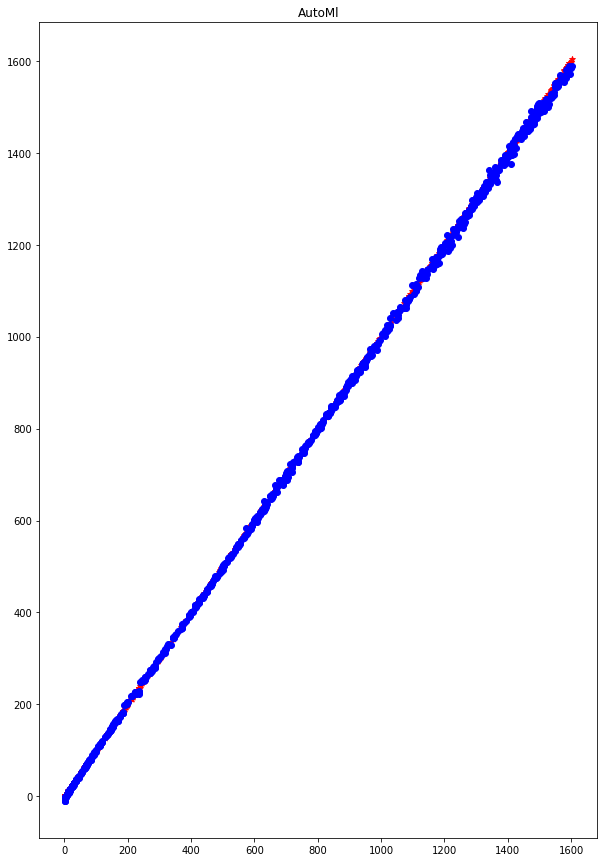

In [215]:
y_train_predicted = aml.predict(X_train)
y_train_predicted = y_train_predicted.as_data_frame()

y_test_predicted_pruned_trees = aml.predict(X_test)
y_test_predicted_pruned_trees = y_test_predicted_pruned_trees.as_data_frame()

mse_train = mean_squared_error(y_train.as_data_frame(), y_train_predicted)
mse_test = mean_squared_error(y_test.as_data_frame(), y_test_predicted_pruned_trees)
mae_train = mean_absolute_error(y_train.as_data_frame(), y_train_predicted)
mae_test = mean_absolute_error(y_test.as_data_frame(), y_test_predicted_pruned_trees)
mape_train = mean_absolute_percentage_error(y_train.as_data_frame(), y_train_predicted)
mape_test = mean_absolute_percentage_error(y_test.as_data_frame(), y_test_predicted_pruned_trees)    
print("Train MSE: {} Test MSE: {}".format(mse_train, mse_test))
print("Train MAE: {} Test MAE: {}".format(mae_train, mae_test))
print("Train MAPE: {} Test MAPE: {}".format(mape_train, mape_test))
r2_train = r2_score(y_train.as_data_frame(), y_train_predicted)
r2_test = r2_score(y_test.as_data_frame(), y_test_predicted_pruned_trees)
print("Train R2: {} Test R2: {}".format(r2_train, r2_test))
predicts = aml.predict(X)
predicts = predicts.as_data_frame()
print('predict X')
print('MSE: ', mean_squared_error(y.as_data_frame(),predicts))
print('MAE: ', mean_absolute_error(y.as_data_frame(),predicts))
print('R2: ', r2_score(y.as_data_frame(),predicts))
dfasd = aml.predict(X)
dfasd = dfasd.as_data_frame()
print('Visualization predict X')
plt.xlabel('', fontsize=60)
plt.ylabel('', fontsize=60)
plt.title("AutoMl")
# plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'k--')
plt.scatter(y.as_data_frame(),y.as_data_frame(), color ='red', marker='*')
plt.scatter(y.as_data_frame(), dfasd,color='blue')

#### Get AutoML event log and Get training timing info

In [216]:
# Get AutoML event log
log = aml.event_log

# Get training timing info
info = aml.training_info

In [217]:
log

timestamp,level,stage,message,name,value
12:40:22.699,INFO,Workflow,Project: AutoML_1_20230629_124022,,
12:40:22.700,INFO,Validation,5-fold cross-validation will be used.,,
12:40:22.700,INFO,Validation,Setting stopping tolerance adaptively based on the training frame: 0.03458572319330373,,
12:40:22.700,INFO,Validation,Build control seed: 1,,
12:40:22.700,INFO,DataImport,training frame: Frame key: AutoML_1_20230629_124022_training_Key_Frame__upload_9fd77e8301d41e4b39363987b5ce47d8.hex cols: 14 rows: 836 chunks: 1 size: 52028 checksum: 8295442123503011628,,
12:40:22.700,INFO,DataImport,validation frame: NULL,,
12:40:22.701,INFO,DataImport,leaderboard frame: NULL,,
12:40:22.701,INFO,DataImport,blending frame: NULL,,
12:40:22.701,INFO,DataImport,response column: yield,,
12:40:22.701,INFO,DataImport,fold column: null,,


In [218]:
info

{'creation_epoch': '1688020823',
 'start_epoch': '1688020823',
 'start_GLM_def_1': '1688020823',
 'start_GBM_def_5': '1688020823',
 'start_DRF_def_1': '1688020825',
 'start_GBM_def_2': '1688020826',
 'start_GBM_def_3': '1688020826',
 'start_GBM_def_4': '1688020827',
 'start_DRF_XRT': '1688020828',
 'start_GBM_def_1': '1688020829',
 'start_DeepLearning_def_1': '1688020829',
 'start_GBM_grid_1': '1688020830',
 'start_DeepLearning_grid_1': '1688020833',
 'start_DeepLearning_grid_2': '1688020893',
 'start_DeepLearning_grid_3': '1688020983',
 'start_StackedEnsemble_best_of_family_xglm': '1688021080',
 'start_StackedEnsemble_all_xglm': '1688021080',
 'stop_epoch': '1688021081',
 'duration_secs': '258'}

## H20 GeneralizedLinearEstimator

In [219]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
yield_glm = H2OGeneralizedLinearEstimator(alpha = 0.25)
yield_glm.train(x = x,
                 y = 'yield',
                 training_frame = X)

# predict using the model and the testing dataset
#predict = yield_glm.predict(test)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1688020456756_16


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,"Elastic Net (alpha = 0.25, lambda = 1.9564 )",12,12,1,Key_Frame__upload_9fd77e8301d41e4b39363987b5ce47d8.hex




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 84215.87545397434
RMSE: 290.1997164953376
MAE: 247.91681731394104
RMSLE: 1.1442463580040982
R^2: 0.6681955719837933
Mean Residual Deviance: 84215.87545397434
Null degrees of freedom: 835
Residual degrees of freedom: 823
Null deviance: 212186655.55627948
Residual deviance: 70404471.87952255
AIC: 11881.657203325442

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_deviance,training_mae,training_r2
0,,2023-06-29 12:45:47,0.000 sec,0,212186655.79498,253811.789228,,,,
1,,2023-06-29 12:45:47,0.010 sec,1,,,290.199716,84215.875454,247.916817,0.668196



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,datetime_1,183.451553,1.000000,0.485137
1,sealevelpressure,41.785507,0.227774,0.110502
2,datetime_2,38.935825,0.212240,0.102966
3,humidity,36.446388,0.198670,0.096382
4,cloudcover,19.944246,0.108717,0.052742
5,dew,16.890221,0.092069,0.044666
6,windspeed,11.977632,0.065290,0.031675
7,visibility,9.208112,0.050194,0.024351
8,windgust,7.244058,0.039488,0.019157
9,winddir,5.073579,0.027656,0.013417


In [220]:
predict = yield_glm.predict(X_test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [221]:
predict.head()
predict;

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Train MSE: 80423.4609289264 Test MSE: 85833.79968123719
Train MAE: 241.09098503149278 Test MAE: 250.82886231973936
Train MAPE: 4.273343991359639 Test MAPE: 5.223503279977199
Train R2: 0.672030342452611 Test R2: 0.6666038882670497
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
predict X
MSE:  84215.87541320168
MAE:  247.9168176761249
R2:  0.6681955725177015
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Visualization predict X


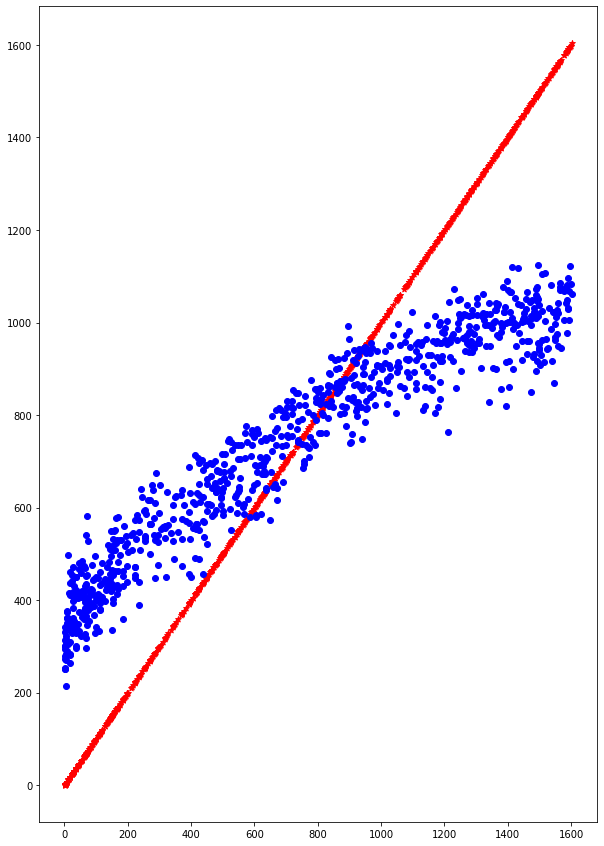

In [222]:
y_train_predicted = yield_glm.predict(X_train)
y_train_predicted = y_train_predicted.as_data_frame()

y_test_predicted_pruned_trees = yield_glm.predict(X_test)
y_test_predicted_pruned_trees = y_test_predicted_pruned_trees.as_data_frame()

mse_train = mean_squared_error(y_train.as_data_frame(), y_train_predicted)
mse_test = mean_squared_error(y_test.as_data_frame(), y_test_predicted_pruned_trees)
mae_train = mean_absolute_error(y_train.as_data_frame(), y_train_predicted)
mae_test = mean_absolute_error(y_test.as_data_frame(), y_test_predicted_pruned_trees)
mape_train = mean_absolute_percentage_error(y_train.as_data_frame(), y_train_predicted)
mape_test = mean_absolute_percentage_error(y_test.as_data_frame(), y_test_predicted_pruned_trees)    
print("Train MSE: {} Test MSE: {}".format(mse_train, mse_test))
print("Train MAE: {} Test MAE: {}".format(mae_train, mae_test))
print("Train MAPE: {} Test MAPE: {}".format(mape_train, mape_test))
r2_train = r2_score(y_train.as_data_frame(), y_train_predicted)
r2_test = r2_score(y_test.as_data_frame(), y_test_predicted_pruned_trees)
print("Train R2: {} Test R2: {}".format(r2_train, r2_test))
predicts = yield_glm.predict(X)
predicts = predicts.as_data_frame()
print('predict X')
print('MSE: ', mean_squared_error(y.as_data_frame(),predicts))
print('MAE: ', mean_absolute_error(y.as_data_frame(),predicts))
print('R2: ', r2_score(y.as_data_frame(),predicts))
dfasd = yield_glm.predict(X)
dfasd = dfasd.as_data_frame()
print('Visualization predict X')
plt.xlabel('', fontsize=60)
plt.ylabel('', fontsize=60)
plt.scatter(y.as_data_frame(),y.as_data_frame(), color ='red', marker='*')
plt.scatter(y.as_data_frame(), dfasd,color='blue')

## H2OGradientBoostingEstimator

In [223]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [224]:
yield_gbe = H2OGradientBoostingEstimator(seed = 1234)
yield_gbe = yield_gbe.train(x = x,
                     y = 'yield',
                     training_frame = X_train)

# convert the segmented models to an H2OFrame
yield_gbe

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1688020456756_17


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,13304.0,5.0,5.0,5.0,10.0,22.0,16.6




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 150.69712703636006
RMSE: 12.275875815450402
MAE: 9.062223660945893
RMSLE: 0.16568196116920436
Mean Residual Deviance: 150.69712703636006

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2023-06-29 12:45:50,0.001 sec,0.0,495.193055,435.728431,245216.161250
1,,2023-06-29 12:45:50,0.006 sec,1.0,445.900503,392.300024,198827.258650
2,,2023-06-29 12:45:50,0.009 sec,2.0,401.539370,353.167742,161233.865671
3,,2023-06-29 12:45:50,0.011 sec,3.0,361.583861,317.951119,130742.888453
4,,2023-06-29 12:45:50,0.013 sec,4.0,325.634718,286.265382,106037.969791
5,,2023-06-29 12:45:50,0.016 sec,5.0,293.303184,257.839686,86026.757587
6,,2023-06-29 12:45:50,0.018 sec,6.0,264.200720,232.255777,69802.020209
7,,2023-06-29 12:45:50,0.020 sec,7.0,238.038912,209.231580,56662.523831
8,,2023-06-29 12:45:50,0.022 sec,8.0,214.481817,188.540864,46002.449654
9,,2023-06-29 12:45:50,0.024 sec,9.0,193.311321,169.898759,37369.266741



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,datetime_1,3.032627e+08,1.000000e+00,9.404819e-01
1,datetime_2,1.870823e+07,6.168984e-02,5.801818e-02
2,dew,1.228099e+05,4.049621e-04,3.808595e-04
3,moonphase,6.986311e+04,2.303716e-04,2.166603e-04
4,sealevelpressure,6.440784e+04,2.123830e-04,1.997424e-04
5,humidity,5.477030e+04,1.806035e-04,1.698543e-04
6,cloudcover,5.056864e+04,1.667486e-04,1.568241e-04
7,visibility,4.955410e+04,1.634032e-04,1.536778e-04
8,windspeed,3.735206e+04,1.231673e-04,1.158366e-04
9,windgust,2.856740e+04,9.420016e-05,8.859355e-05


In [225]:
yhat = yield_gbe.predict(X_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [226]:
yhat = pd.DataFrame(yhat)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Train MSE: 150.696635182898 Test MSE: 614.4938936799239
Train MAE: 9.062213289780342 Test MAE: 18.235871055090072
Train MAPE: 0.09523298419437322 Test MAPE: 0.13393971604676302
Train R2: 0.9993854539053205 Test R2: 0.9976131794747831
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
predict X
MSE:  475.79854125856446
MAE:  15.492552345368264
R2:  0.9981253883332019
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Visualization predict X


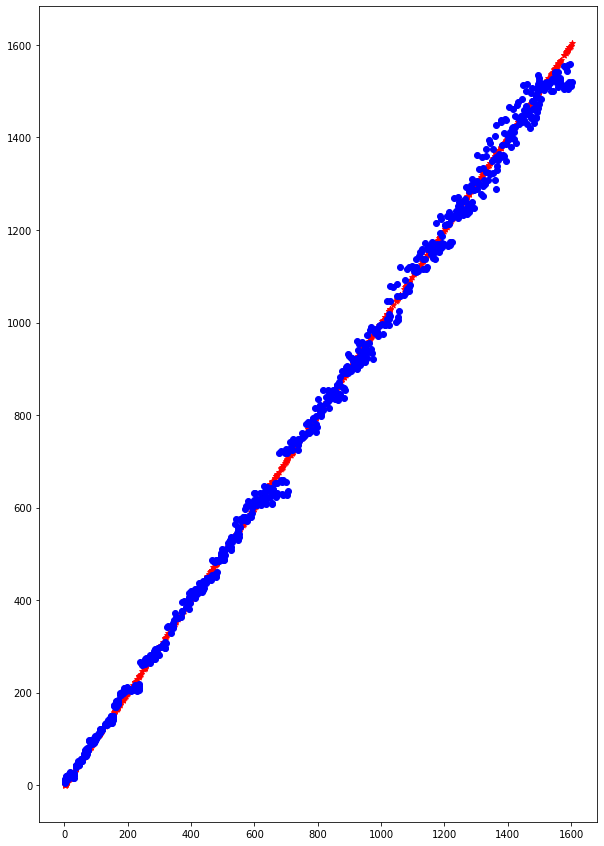

In [227]:
y_train_predicted = yield_gbe.predict(X_train)
y_train_predicted = y_train_predicted.as_data_frame()

y_test_predicted_pruned_trees = yield_gbe.predict(X_test)
y_test_predicted_pruned_trees = y_test_predicted_pruned_trees.as_data_frame()

mse_train = mean_squared_error(y_train.as_data_frame(), y_train_predicted)
mse_test = mean_squared_error(y_test.as_data_frame(), y_test_predicted_pruned_trees)
mae_train = mean_absolute_error(y_train.as_data_frame(), y_train_predicted)
mae_test = mean_absolute_error(y_test.as_data_frame(), y_test_predicted_pruned_trees)
mape_train = mean_absolute_percentage_error(y_train.as_data_frame(), y_train_predicted)
mape_test = mean_absolute_percentage_error(y_test.as_data_frame(), y_test_predicted_pruned_trees)    
print("Train MSE: {} Test MSE: {}".format(mse_train, mse_test))
print("Train MAE: {} Test MAE: {}".format(mae_train, mae_test))
print("Train MAPE: {} Test MAPE: {}".format(mape_train, mape_test))
r2_train = r2_score(y_train.as_data_frame(), y_train_predicted)
r2_test = r2_score(y_test.as_data_frame(), y_test_predicted_pruned_trees)
print("Train R2: {} Test R2: {}".format(r2_train, r2_test))
predicts = yield_gbe.predict(X)
predicts = predicts.as_data_frame()
print('predict X')
print('MSE: ', mean_squared_error(y.as_data_frame(),predicts))
print('MAE: ', mean_absolute_error(y.as_data_frame(),predicts))
print('R2: ', r2_score(y.as_data_frame(),predicts))
dfasd = yield_gbe.predict(X)
dfasd = dfasd.as_data_frame()
print('Visualization predict X')
plt.xlabel('', fontsize=60)
plt.ylabel('', fontsize=60)
plt.scatter(y.as_data_frame(),y.as_data_frame(), color ='red', marker='*')
plt.scatter(y.as_data_frame(), dfasd,color='blue')